In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy.ma as ma
import numpy.linalg as linalg
from scipy.stats.stats import pearsonr

# Estadística
from scipy import stats 
from scipy import special

# Cartografía 
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.util import add_cyclic_point
import cartopy.io.shapereader as shpreader

# Lectura de datos
from netCDF4 import Dataset
import xarray as xr

# Índices Climáticos
from xclim.core.calendar import percentile_doy
from xclim.indices import tn10p, tx10p

from scipy.fft import fft 
from statsmodels.tsa import stattools 
from scipy import signal

import warnings
warnings.filterwarnings('ignore')

In [2]:
path='/Users/barbo/Desktop/analisis multivariante/indices/'
file1='Tn10p_ESP_nan.nc'
tn10 = xr.open_dataset(path+file1)

In [3]:
tn10=tn10.__xarray_dataarray_variable__


In [4]:
#remallado de la matriz para coger la mitad de los puntos¡:
tn10_remallado=tn10.interp(lat=tn10.lat[::2]).interp(lon=tn10.lon[::2])
tn10_remallado=tn10_remallado.set_index(lon='x')
tn10_remallado=tn10_remallado.set_index(lat='y')

In [5]:
tn10_remallado

<xarray.DataArray '__xarray_dataarray_variable__' (time: 1368, lat: 95, lon: 115)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2014-12-01
  * lat      (lat) float64 44.17 44.08 43.99 43.9 ... 35.98 35.89 35.8 35.71
  * lon      (lon) float64 -9.673 -9.556 -9.439 -9.322 ... 3.431 3.548 3.665

In [6]:
lon=tn10_remallado.lon
lat=tn10_remallado.lat

time=tn10_remallado.time

In [7]:
lat

<xarray.DataArray 'lat' (lat: 95)>
array([44.169965, 44.079965, 43.989965, 43.899965, 43.809965, 43.719965,
       43.629965, 43.539965, 43.449965, 43.359965, 43.269965, 43.179965,
       43.089965, 42.999965, 42.909965, 42.819965, 42.729965, 42.639965,
       42.549965, 42.459965, 42.369965, 42.279965, 42.189965, 42.099965,
       42.009965, 41.919965, 41.829965, 41.739965, 41.649965, 41.559965,
       41.469965, 41.379965, 41.289965, 41.199965, 41.109965, 41.019965,
       40.929965, 40.839965, 40.749965, 40.659965, 40.569965, 40.479965,
       40.389965, 40.299965, 40.209965, 40.119965, 40.029965, 39.939965,
       39.849965, 39.759965, 39.669965, 39.579965, 39.489965, 39.399965,
       39.309965, 39.219965, 39.129965, 39.039965, 38.949965, 38.859965,
       38.769965, 38.679965, 38.589965, 38.499965, 38.409965, 38.319965,
       38.229965, 38.139965, 38.049965, 37.959965, 37.869965, 37.779965,
       37.689965, 37.599965, 37.509965, 37.419965, 37.329965, 37.239965,
       37.149965, 37.059965, 36.969965, 36.879965, 36.789965, 36.699965,
       36.609965, 36.519965, 36.429965, 36.339965, 36.249965, 36.159965,
       36.069965, 35.979965, 35.889965, 35.799965, 35.709965])
Coordinates:
  * lat      (lat) float64 44.17 44.08 43.99 43.9 ... 35.98 35.89 35.8 35.71

In [8]:
lon

<xarray.DataArray 'lon' (lon: 115)>
array([-9.672583, -9.555583, -9.438583, -9.321583, -9.204583, -9.087583,
       -8.970583, -8.853583, -8.736583, -8.619583, -8.502583, -8.385583,
       -8.268583, -8.151583, -8.034583, -7.917583, -7.800583, -7.683583,
       -7.566583, -7.449583, -7.332583, -7.215583, -7.098583, -6.981583,
       -6.864583, -6.747583, -6.630583, -6.513583, -6.396583, -6.279583,
       -6.162583, -6.045583, -5.928583, -5.811583, -5.694583, -5.577583,
       -5.460583, -5.343583, -5.226583, -5.109583, -4.992583, -4.875583,
       -4.758583, -4.641583, -4.524583, -4.407583, -4.290583, -4.173583,
       -4.056583, -3.939583, -3.822583, -3.705583, -3.588583, -3.471583,
       -3.354583, -3.237583, -3.120583, -3.003583, -2.886583, -2.769583,
       -2.652583, -2.535583, -2.418583, -2.301583, -2.184583, -2.067583,
       -1.950583, -1.833583, -1.716583, -1.599583, -1.482583, -1.365583,
       -1.248583, -1.131583, -1.014583, -0.897583, -0.780583, -0.663583,
       -0.546583, -0.429583, -0.312583, -0.195583, -0.078583,  0.038417,
        0.155417,  0.272417,  0.389417,  0.506417,  0.623417,  0.740417,
        0.857417,  0.974417,  1.091417,  1.208417,  1.325417,  1.442417,
        1.559417,  1.676417,  1.793417,  1.910417,  2.027417,  2.144417,
        2.261417,  2.378417,  2.495417,  2.612417,  2.729417,  2.846417,
        2.963417,  3.080417,  3.197417,  3.314417,  3.431417,  3.548417,
        3.665417])
Coordinates:
  * lon      (lon) float64 -9.673 -9.556 -9.439 -9.322 ... 3.431 3.548 3.665

In [9]:
nlon=lon.shape[0]
nlat=lat.shape[0]
nt=time.shape[0]

nyears= int(nt/12)
nyears

114

In [10]:
def season(Z,e1,e2,nyrs):
#para que funcione los datos Z tienen que estar con dimensiones nyrs,12,ns
#e1 y e2 son los meses inicial y final de las estaciones
#e1=2;e2=4 ;esta='MAM';
#e1=5;e2=7 ;esta='JJA';
#e1=6;e2=8 ;esta='JAS';
#e1=8;e2=10 ;esta='SON';
#e1=11;e2=1 ;esta='DJF';
#e1=10;e2=1 ;esta='NDJF';
   
    if e1==11:
        Zs1= Z[:-1,e1,:]
        Zs2= Z[1:,:e2,:].mean(1)
        n1=1
        n2=e2+1
        Zs=(Zs1*n1+Zs2*n2)/(n1+n2)
        nyrs=nyrs-1
    elif e1>e2:
        Zs1= Z[:-1,e1:11,:].mean(1)
        Zs2= Z[1:,:e2,:].mean(1)
        n1=12-e1
        n2=e2+1
        Zs=(Zs1*n1+Zs2*n2)/(n1+n2)
        nyrs=nyrs-1
    else:
        Zs = Z[:,e1:e2,:].mean(1)

    return Zs ,nyrs

# Esta función te proporciona anomalías ya sean estandarizadas o no, al introducir un campo con dimension (espacio,tiempo)
def anom(X, nyr, par):
    # si par = st quiere decir que estandarizo. Si no, no (pongo, por ejemplo,'pp')
    ns, nt = np.shape(X)  # una de las dimensiones es tiempo, la segunda, y la otra puede ser el numero de modos, o de espacios..
    nmes = int(nt / (nyr));

    # dividimos el número de tiempos por el numero de años porque en caso de que queramos calcular
    # anomalias estacionales de una secuencia mensual (enero-media(diciembre-enero-febrero)) en lugar de una media estacional

    An = ma.empty([ns, nt])

    for i in range(ns):
        A = X[i, :].reshape(nyr, nmes)
        mA = np.mean(A)
        for j in range(0, nyr):
            A[j, :] = A[j, :] - mA

        if par == 'st':

            stdA = ma.empty([nmes, ])
            for k in range(nmes):
                stdA[k] = np.std(A[:, k])
                if stdA[k] != 0:
                    A[:, k] = A[:, k] / stdA[k]

        # se reorganizan los datos
        A = np.transpose(A.reshape(nyr * nmes, 1))
        An[i, :] = A;

    return An

In [11]:
tn10_remallado_prim=tn10_remallado.groupby('time.season')['MAM']

In [12]:
tn10_remallado_prim

<xarray.DataArray '__xarray_dataarray_variable__' (time: 342, lat: 95, lon: 115)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1901-03-01 1901-04-01 ... 2014-05-01
  * lat      (lat) float64 44.17 44.08 43.99 43.9 ... 35.98 35.89 35.8 35.71
  * lon      (lon) float64 -9.673 -9.556 -9.439 -9.322 ... 3.431 3.548 3.665

In [13]:
lon = tn10_remallado_prim.lon
lat = tn10_remallado_prim.lat
time = tn10_remallado_prim.time
nm = 12
nyears = int(tn10_remallado_prim.time.shape[0]/nm)

In [14]:
tn10_remallado_prim

<xarray.DataArray '__xarray_dataarray_variable__' (time: 342, lat: 95, lon: 115)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1901-03-01 1901-04-01 ... 2014-05-01
  * lat      (lat) float64 44.17 44.08 43.99 43.9 ... 35.98 35.89 35.8 35.71
  * lon      (lon) float64 -9.673 -9.556 -9.439 -9.322 ... 3.431 3.548 3.665

In [15]:
tn10_primavera_anomalia= tn10_remallado_prim-tn10_remallado_prim.mean(axis=0)

In [16]:
[nt,nlat,nlon]=tn10_primavera_anomalia.shape

In [17]:
tn10_primavera_anomalia=np.reshape(np.array(tn10_primavera_anomalia), (int(nt/3),3,nlat,nlon)).mean(axis=1)

In [18]:
tn10_primavera_anomalia.shape

(114, 95, 115)

In [19]:
tn10_primavera_anomalia

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [20]:
# primero hay que poner los datos como una matriz (espacio, tiempo), para poder correr las funciones
tn10_prim_nans=np.reshape(tn10_primavera_anomalia,(114,nlat*nlon))
tn10_prim_nans.shape

(114, 10925)

In [21]:
def quitonans(mat):
    out = mat[:,~np.isnan(mat.mean(axis = 0))]
    return out

def pongonans(matred,mat):
    out = mat.mean(axis = 0 )
    out[:] = np.nan
    out[~np.isnan(mat.mean(axis = 0))] = matred
    return out

In [22]:
tn10_primavera_sin_nan=quitonans(tn10_prim_nans)
tn10_primavera_sin_nan.shape
# Ahora tenemos una matriz TIEMPO ESPACIO sin los valores nan

(114, 5049)

In [23]:
C=np.dot(np.transpose(tn10_primavera_sin_nan),tn10_primavera_sin_nan)
# C tiene que ser una matriz ESPACIO-ESPACIO

In [24]:
C.shape

(5049, 5049)

In [25]:
eof_tn10,d_tn10,eof2_tn10=linalg.svd(C)

In [26]:
fvar_tn10=(d_tn10)/sum(d_tn10)

sum(fvar_tn10[:10])

0.8477085457049024

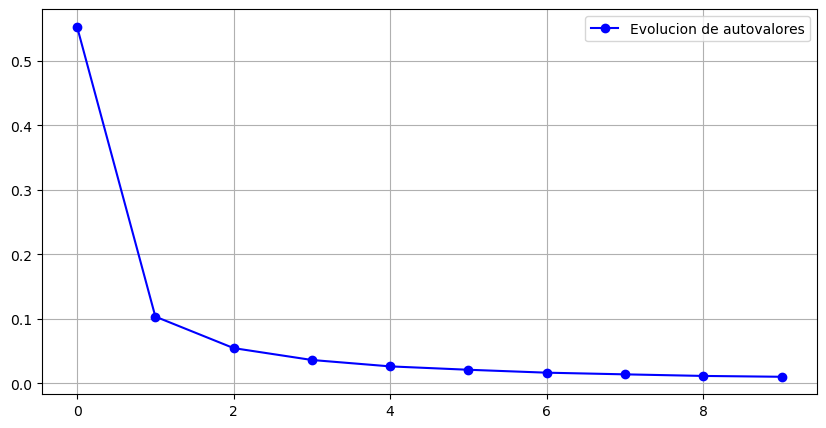

In [27]:
fig,ax = plt.subplots(figsize = (10,5))
plt.plot(fvar_tn10[:10],color='Blue',marker='o',label='Evolucion de autovalores')
plt.legend()
plt.grid()

In [28]:
PC=np.dot(tn10_primavera_sin_nan,eof_tn10[:,:4])

In [29]:
PC.shape

(114, 4)

In [30]:
PCs=(PC-np.mean(PC))/np.std(PC)

In [31]:
modo =1 
PC1s=PCs[:,0:4]
PC1s.shape

(114, 4)

Text(0.5, 1.0, 'Primera componente principal fvar=0.55')

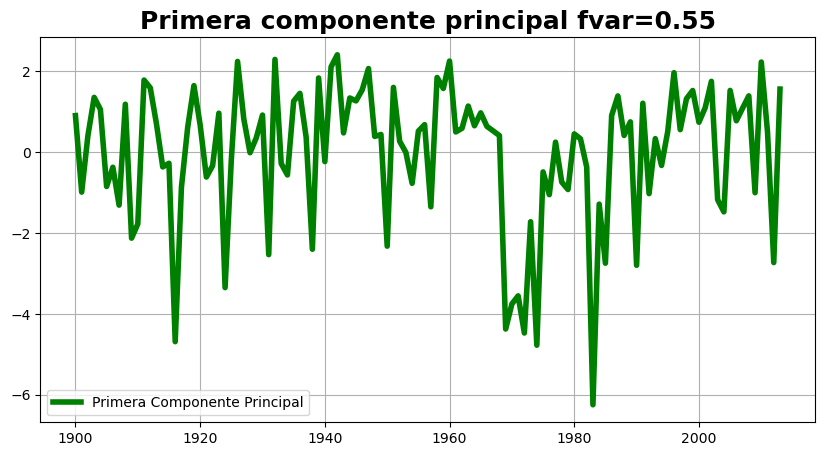

In [32]:
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1900,2014),PC1s[:,0],linewidth= 4,color='green',label='Primera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('Primera componente principal fvar='+ str( round(fvar_tn10[0],2)),fontsize=18,weight='bold')


In [33]:
def regresLinSim(x,y):
    alpha = 0.05
    x = np.squeeze(np.array(x))
    y = np.squeeze(np.array(y))
    N = x.size
    xm = x.mean()
    ym = y.mean()
    SXY = np.sum(x * y) - N * xm * ym
    SXX = np.sum(x * x) - N * xm * xm
    SYY = np.sum(y * y) - N * ym * ym
    SSR = SXY ** 2 / SXX 
    a1 = SXY / SXX
    a0 = ym - xm * a1
    yhat =  a0 + a1 * x
    e = y - yhat
    R2 = SSR / SYY
    SSE = SYY - SSR
    rho = SXY / np.sqrt(SXX*SYY)
    Se = np.sqrt( SSE / (N - 2 ) )
    t = stats.t.ppf(1-alpha/2,N-2)
    IC_a1 = a1 + np.array([-1, 1]) * t * Se / np.sqrt(SXX)
    IC_a0 = a0 + np.array([-1, 1]) * t * Se * np.sqrt(np.sum(x*x)/N/SXX)
    xvec = np.linspace(x.min(),x.max(),100)
    muY = ym + a1 * (xvec - xm) 
    AmuY = t * Se * np.sqrt(1/N + (xvec-xm) * (xvec -xm) /SXX)
    AY = t * Se * np.sqrt( 1 + 1/N + (xvec-xm) * (xvec -xm) /SXX)
    fig,ax = plt.subplots(1,2,figsize=(18,8))
    ax[0].plot(x,y,'o',markeredgecolor='black',markeredgewidth=1)
    #ax[0].grid()
    ax[0].plot(xvec,muY+AmuY,color='orange')
    ax[0].plot(xvec,muY-AmuY,color='orange')
    ax[0].plot([x.min(), x.max()],[a0+a1*x.min(), a0+a1*x.max()],'r')
    ax[0].plot(xvec,muY+AY,color='k')
    ax[0].plot(xvec,muY-AY,color='k')
    ax[0].set_title('Simple Linear Regression')
    ax[0].set_ylabel('y')
    ax[0].set_xlabel('x')
    ax[0].text(0.5,0.05,r'$a_0$=[%.3f,%.3f]''\n'r'$a_1$=[%.3f,%.3f]''\n'r'$\rho =$ %.2f'%(IC_a0[0],IC_a0[1],IC_a1[0],IC_a1[1],rho), 
                transform=ax[0].transAxes,size=11,bbox=dict(boxstyle='round', facecolor='w', alpha=0.7))
    #ax[0].text(0.5,0.1,'a1=[%.3f,%.3f]'%(IC_a1[0],IC_a1[1]), transform=ax[0].transAxes)
    #ax[0].text(0.5,0.15,'rho=%.2f'%(rho), transform=ax[0].transAxes)
    ax[1].plot(yhat,e/Se,'o',markeredgecolor='black',markeredgewidth=1)
    #ax[1].grid()
    ax[1].set_xlabel(r'$\hat{y}$')
    ax[1].set_ylabel(r'$\hat{e}/\sigma_E$')
    ax[1].set_title('Standardized residuals')
    return ax, a1, a0, rho, IC_a1, IC_a0, muY, AmuY, AY

Text(0.5, 1.0, 'segunda componente principal fvar=0.1')

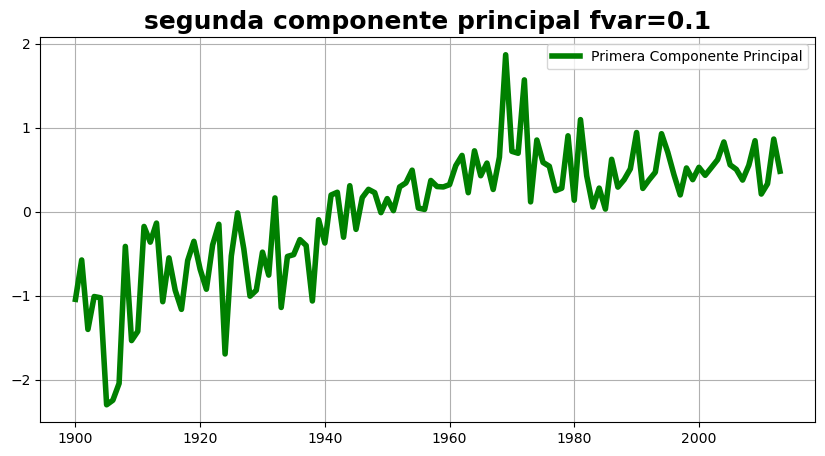

In [34]:
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1900,2014),PC1s[:,1],linewidth= 4,color='green',label='Primera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('segunda componente principal fvar='+ str( round(fvar_tn10[1],2)),fontsize=18,weight='bold')


Text(0.5, 1.0, 'Tercera componente principal fvar=0.05')

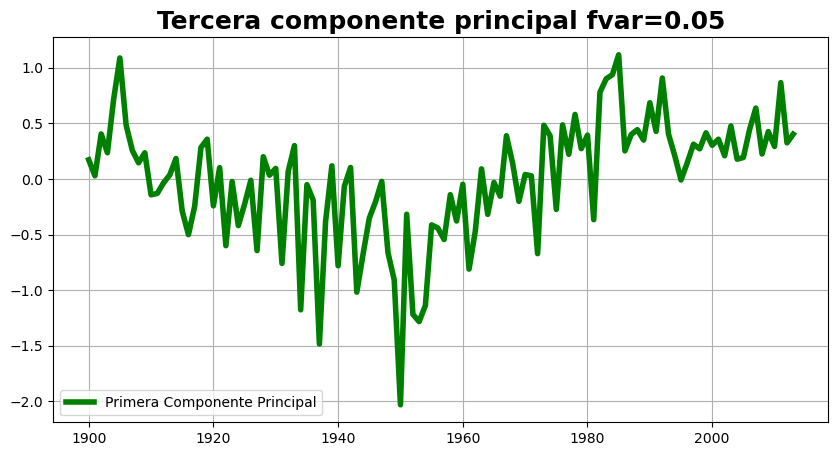

In [35]:
fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1900,2014),PC1s[:,2],linewidth= 4,color='green',label='Primera Componente Principal')
ax.grid()
ax.legend()
ax.set_title('Tercera componente principal fvar='+ str( round(fvar_tn10[2],2)),fontsize=18,weight='bold')


In [36]:
nyc=12
n=10
Wn=2*1/nyc
b,a=signal.butter(n, Wn, btype='low', analog=False, output='ba', fs=None)
#Filtro la señal ampliada y me quedo con la parte central:
low = signal.filtfilt(b,a,PC1s[:,0])

b,a=signal.butter(n, Wn, btype='high', analog=False, output='ba', fs=None)
#Filtro la señal ampliada y me quedo con la parte central:
high = signal.filtfilt(b,a,PC1s[:,0])

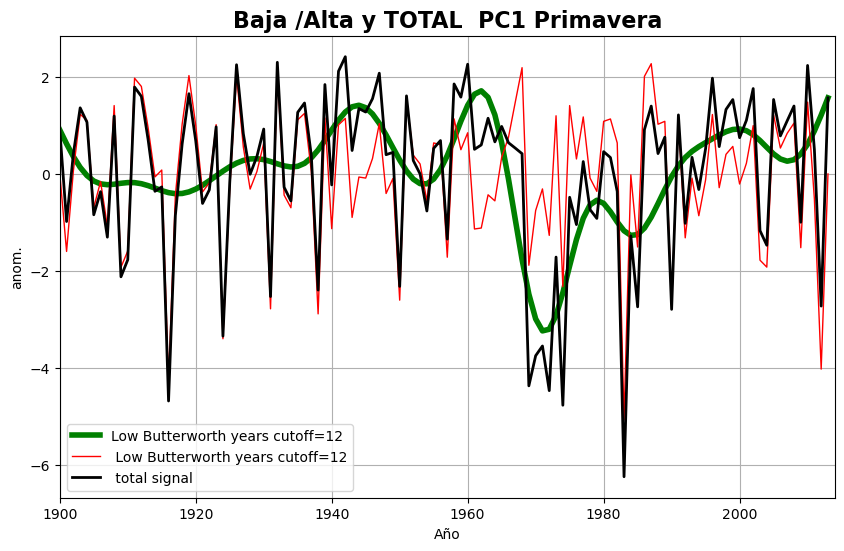

In [37]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_title('Baja /Alta y TOTAL  PC1 Primavera',fontsize=16,weight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('anom.')
ax.plot(range(1900,2014),low,linewidth= 4,color='green',label='Low Butterworth years cutoff='+str(nyc))
ax.plot(range(1900,2014),high,linewidth= 1,color='red',label=' Low Butterworth years cutoff='+str(nyc))
ax.plot(range(1900,2014),PC1s[:,0],linewidth= 2,color='black',label=' total signal')
ax.set_xlim([1900,2014])
ax.legend()
ax.grid()

In [38]:
nyc=12
n=10
Wn=2*1/nyc
b,a=signal.butter(n, Wn, btype='low', analog=False, output='ba', fs=None)
#Filtro la señal ampliada y me quedo con la parte central:
low = signal.filtfilt(b,a,PC1s[:,2])

b,a=signal.butter(n, Wn, btype='high', analog=False, output='ba', fs=None)
#Filtro la señal ampliada y me quedo con la parte central:
high = signal.filtfilt(b,a,PC1s[:,2])

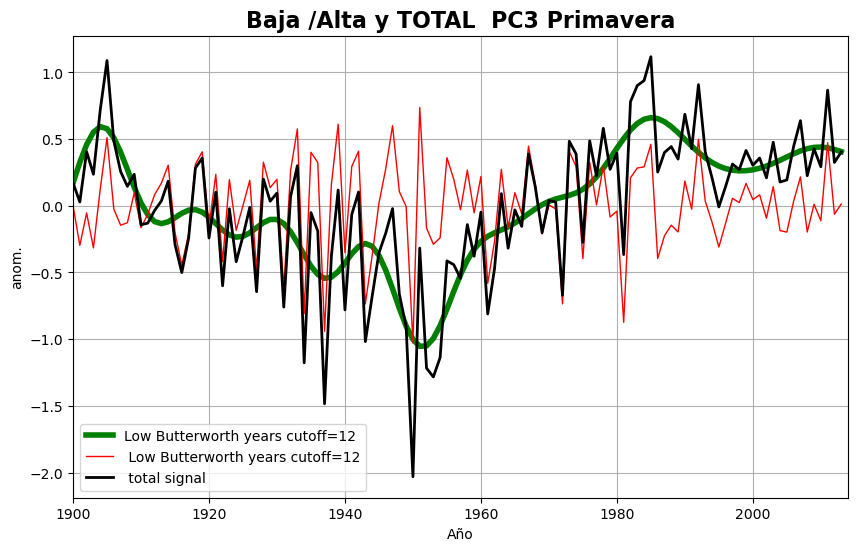

In [39]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.set_title('Baja /Alta y TOTAL  PC3 Primavera',fontsize=16,weight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('anom.')
ax.plot(range(1900,2014),low,linewidth= 4,color='green',label='Low Butterworth years cutoff='+str(nyc))
ax.plot(range(1900,2014),high,linewidth= 1,color='red',label=' Low Butterworth years cutoff='+str(nyc))
ax.plot(range(1900,2014),PC1s[:,2],linewidth= 2,color='black',label=' total signal')
ax.set_xlim([1900,2014])
ax.legend()
ax.grid()

In [40]:
def pearsonr_2D(y, x):
    upper = np.sum((x - np.mean(x)) * (y - np.mean(y, axis=1)[:,None]), axis=1)
    lower = np.sqrt(np.sum(np.power(x - np.mean(x), 2)) * np.sum(np.power(y - np.mean(y, axis=1)[:,None], 2), axis=1))
    rho = upper / lower
    return rho

def IndexRegrCorr(Data,Index,alfa,sig,pp):
    try:
        [ns,nt]=Data.shape # n1=espacio, n2=tiempo
    except ValueError:
        # si Data es un índice
        ns=1
        nt=len(Data)
        Data = np.array([Data])
        
    cor=ma.empty([ns,])
    Pvalue=ma.empty([ns,])
    #Index tiene que estar estandarizado, es decir, dividido por la desviación tipica
    reg=np.dot(Data,Index)/(nt-1)
    
    for nn in range(ns): 
        bb=pearsonr(Data[nn,:],Index) 
        cor[nn]=bb[0]
        Pvalue[nn]=bb[1]

    if sig == 'test-t':
        cor_sig=ma.masked_where(Pvalue>alfa,cor)
        reg_sig=ma.masked_where(Pvalue>alfa,reg)
        
    if sig == 'MonteCarlo':
        corp = ma.empty([ns,pp])
        for p in range(pp):
            corp[:,p] = pearsonr_2D(Data,np.random.permutation(Index))
            # aquí uso la función pearsonr_2D y me ahorro un bucle en ns
        
        for nn in range(ns): 
            hcor = np.count_nonzero((cor[nn]>0)&(corp[nn,:]<cor[nn])|(cor[nn]<0)&(corp[nn,:]>cor[nn]))
            # nivel de confianza
            Pvalue[nn] = hcor/pp
            
        cor_sig = ma.masked_where(Pvalue<(1-alfa),cor)
        reg_sig = ma.masked_where(Pvalue<(1-alfa),reg)
        
    return cor,Pvalue,cor_sig,reg,reg_sig

def dibujo_1_mapa_cartopy(A,lon,lat,levs,cmap1,l1,titulo, ax):
    im=ax.contourf(lon,lat,A
                   ,cmap=cmap1,levels=levs,extend='both',transform=ccrs.PlateCarree())
    ax.coastlines(linewidth=2);
    ax.set_title(titulo,fontsize=28)
    cbar = plt.colorbar(im, extend='neither', spacing='proportional',
                orientation='vertical', shrink=0.7, format="%2.1f")
    cbar.set_label(l1, size=28)
    cbar.ax.tick_params(labelsize=28) 
# Esta función te sirve para dibujar en una misma figura dos mapas superpuestos, como podría ser
# el caso de un mapa A de regresion y un mapa B de correlacion significativa, del que solo te interesa
# las regiones donde es significativa la señal
def dibujo_2_mapas_cartopy_hatches(A,B,lon,lat, levs, cmap1, l1, t1):

    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
    
    im = ax.contourf(lon,lat,A.reshape(len(lat),len(lon)), 
                     extend='both',cmap=cmap1,levels=levs,transform = ccrs.PlateCarree())

    ax.coastlines(linewidth=2); 
    fig.colorbar(im,ax=ax,label = l1) #Para la barra de colores
    im = ax.contourf(lon,lat,B.reshape(len(lat),len(lon))
                 ,extend='both'
                 ,hatches='.',cmap=cmap1,alfa=0,levels=levs,transform = ccrs.PlateCarree())
    #el uso de alfa=0 lo que hace es que solo salgan los puntos y no salgan los colors porque los pones totalmente transparentes
    ax.set_ylim(lat[-1], lat[0])
    ax.set_xlim(lon[0], lon[-1])

In [41]:
PC1s.shape

(114, 4)

In [42]:
cor1,Pvalue1,cor_sig1,reg1,reg1_sig=IndexRegrCorr(np.transpose(tn10_primavera_sin_nan),np.transpose(PC1s[:,0]),0.01,'MonteCarlo',100)
cor2,Pvalue2,cor_sig2,reg2,reg2_sig=IndexRegrCorr(np.transpose(tn10_primavera_sin_nan),np.transpose(PC1s[:,1]),0.01,'MonteCarlo',100)
cor3,Pvalue3,cor_sig3,reg3,reg3_sig=IndexRegrCorr(np.transpose(tn10_primavera_sin_nan),np.transpose(PC1s[:,2]),0.01,'MonteCarlo',100)

In [43]:
mat=np.expand_dims((tn10_primavera_anomalia)[0],axis=0)


In [44]:
reg1_final=pongonans(np.squeeze(reg1),mat)
reg_sig_1_final=pongonans(np.squeeze(reg1_sig),mat)

cor1_final=pongonans(np.squeeze(cor1),mat)
cor_sig1_final=pongonans(np.squeeze(cor_sig1),mat)

In [45]:
print(reg1.shape)
print(reg1_final.shape)

(5049,)
(95, 115)


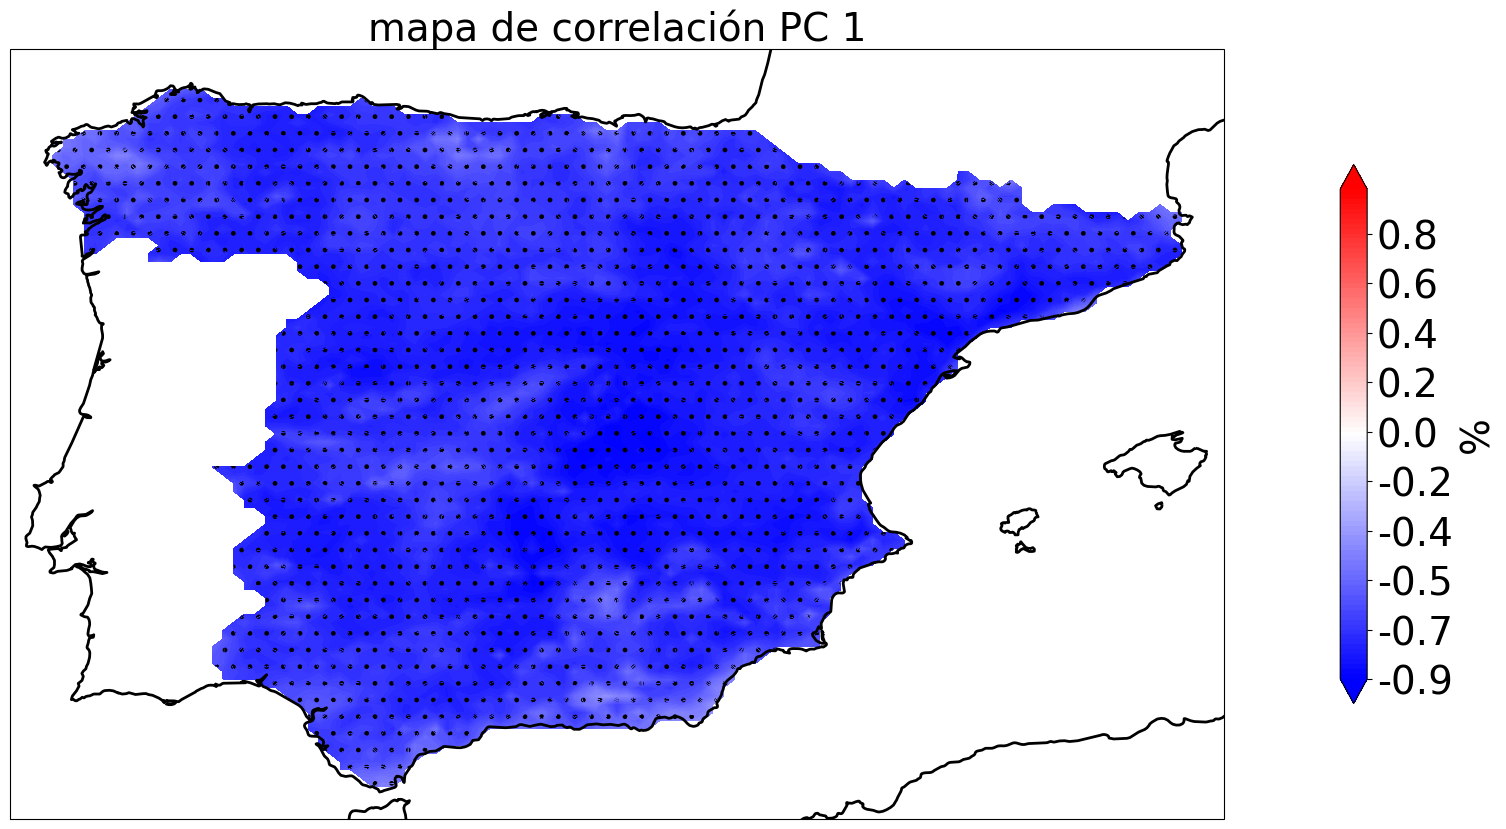

In [46]:
rango_reg=max(abs(np.nanmin(cor1_final)),abs(np.nanmax(cor1_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(cor1_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de correlación PC 1', ax)
ax.contourf(lon,lat,np.reshape(cor_sig1_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')
  

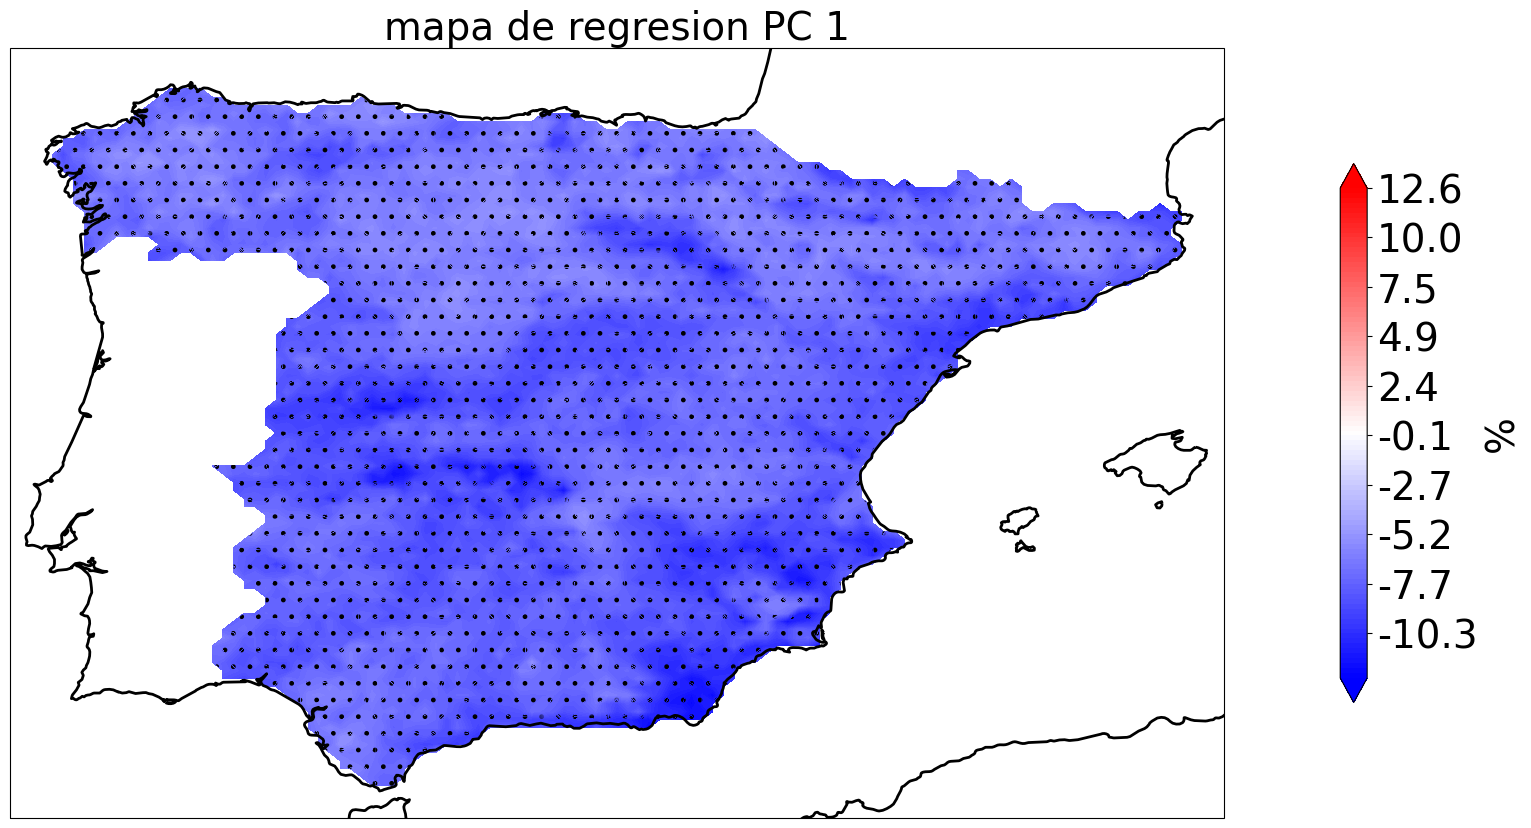

In [47]:
rango_reg=max(abs(np.nanmin(reg1_final)),abs(np.nanmax(reg1_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg1_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 1', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_1_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

(-0.9989038244520912, 9.00455224610909e-151)


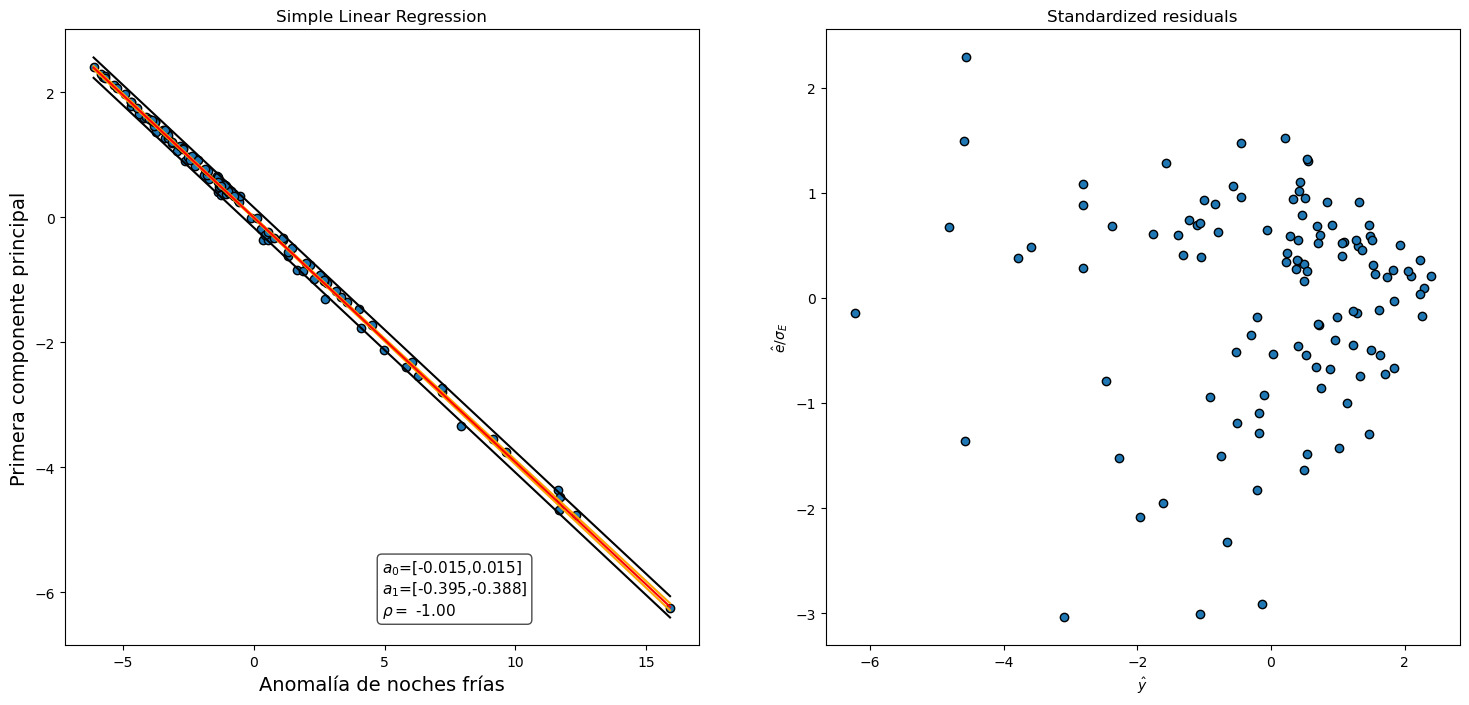

In [48]:
ax, a1, a0, rho, IC_a1, IC_a0, muY, AmuY, AY = regresLinSim(np.nanmean(tn10_primavera_anomalia,axis=(1,2)),PC1s[:,0])
ax[0].set_xlabel('Anomalía de noches frías',size=14)
ax[0].set_ylabel('Primera componente principal',size=14)
print(pearsonr(np.nanmean(tn10_primavera_anomalia,axis=(1,2)),PC1s[:,0]))

Text(0.5, 1.0, 'Serie anomalías de noches frías (primavera)')

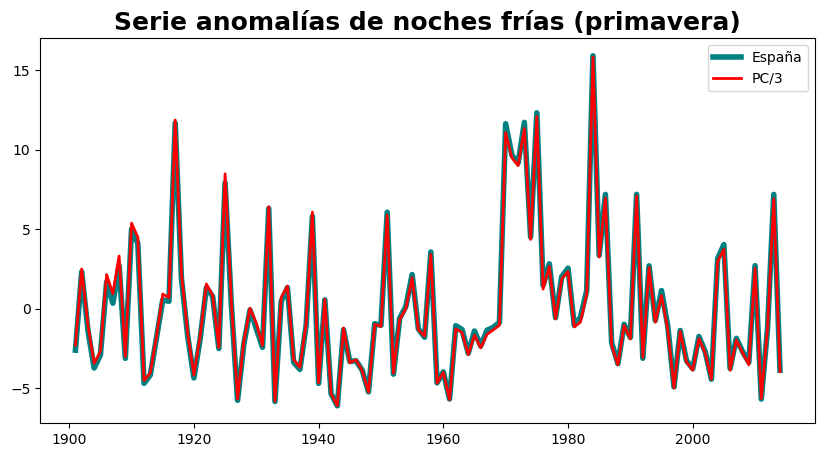

In [49]:

fig,ax=plt.subplots(figsize = (10,5))
ax.plot(range(1901,2014+1),np.nanmean(tn10_primavera_anomalia,axis=(1,2)),linewidth= 4,color='teal',label='España')

var = np.nanmean(np.squeeze(reg1_final))

ax.plot(range(1901,2014+1),PC1s[:,0]*var/3,linewidth= 2,color='r',label='PC/3')


ax.legend()
ax.set_title('Serie anomalías de noches frías (primavera)',fontsize=18,weight='bold')

In [50]:
reg2_final=pongonans(np.squeeze(reg2),mat)
reg_sig_2_final=pongonans(np.squeeze(reg2_sig),mat)

cor2_final=pongonans(np.squeeze(cor2),mat)
cor_sig2_final=pongonans(np.squeeze(cor_sig2),mat)

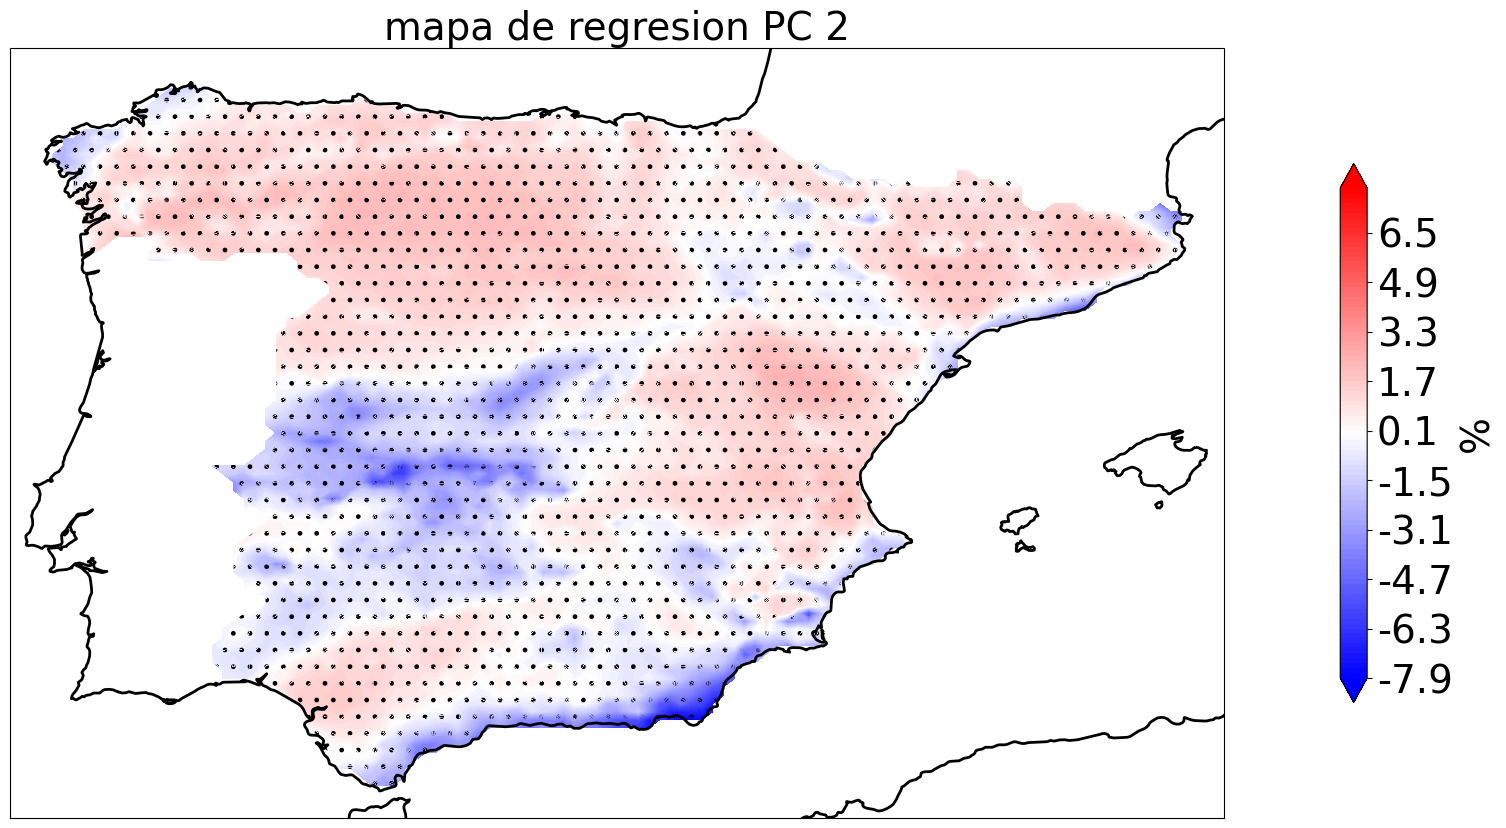

In [51]:
rango_reg=max(abs(np.nanmin(reg2_final)),abs(np.nanmax(reg_sig_2_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg2_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 2', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_2_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

In [52]:
reg3_final=pongonans(np.squeeze(reg3),mat)
reg_sig_3_final=pongonans(np.squeeze(reg3_sig),mat)


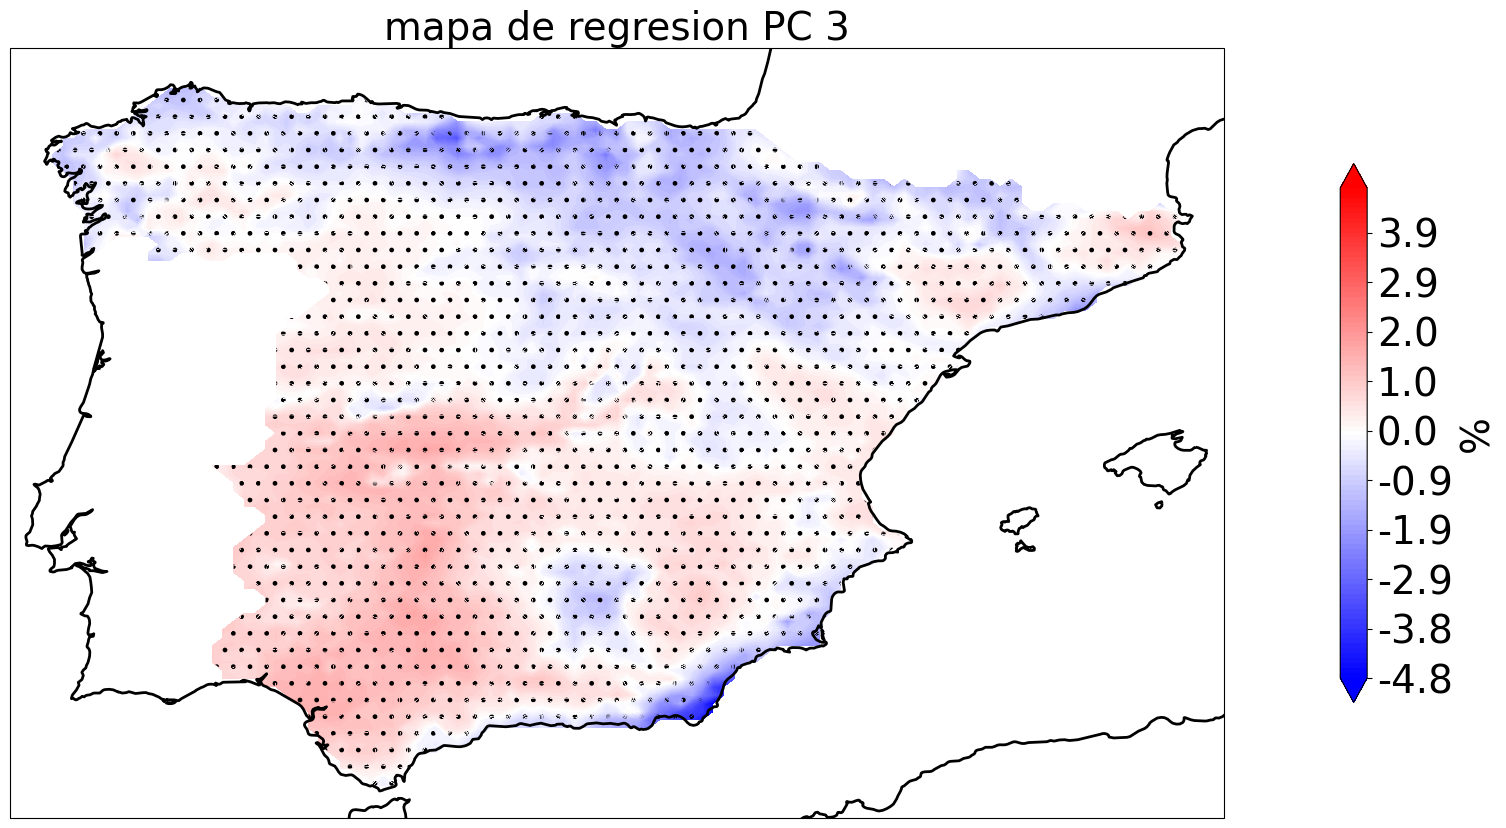

In [53]:
rango_reg=max(abs(np.nanmin(reg3_final)),abs(np.nanmax(reg_sig_3_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg3_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 3', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_3_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

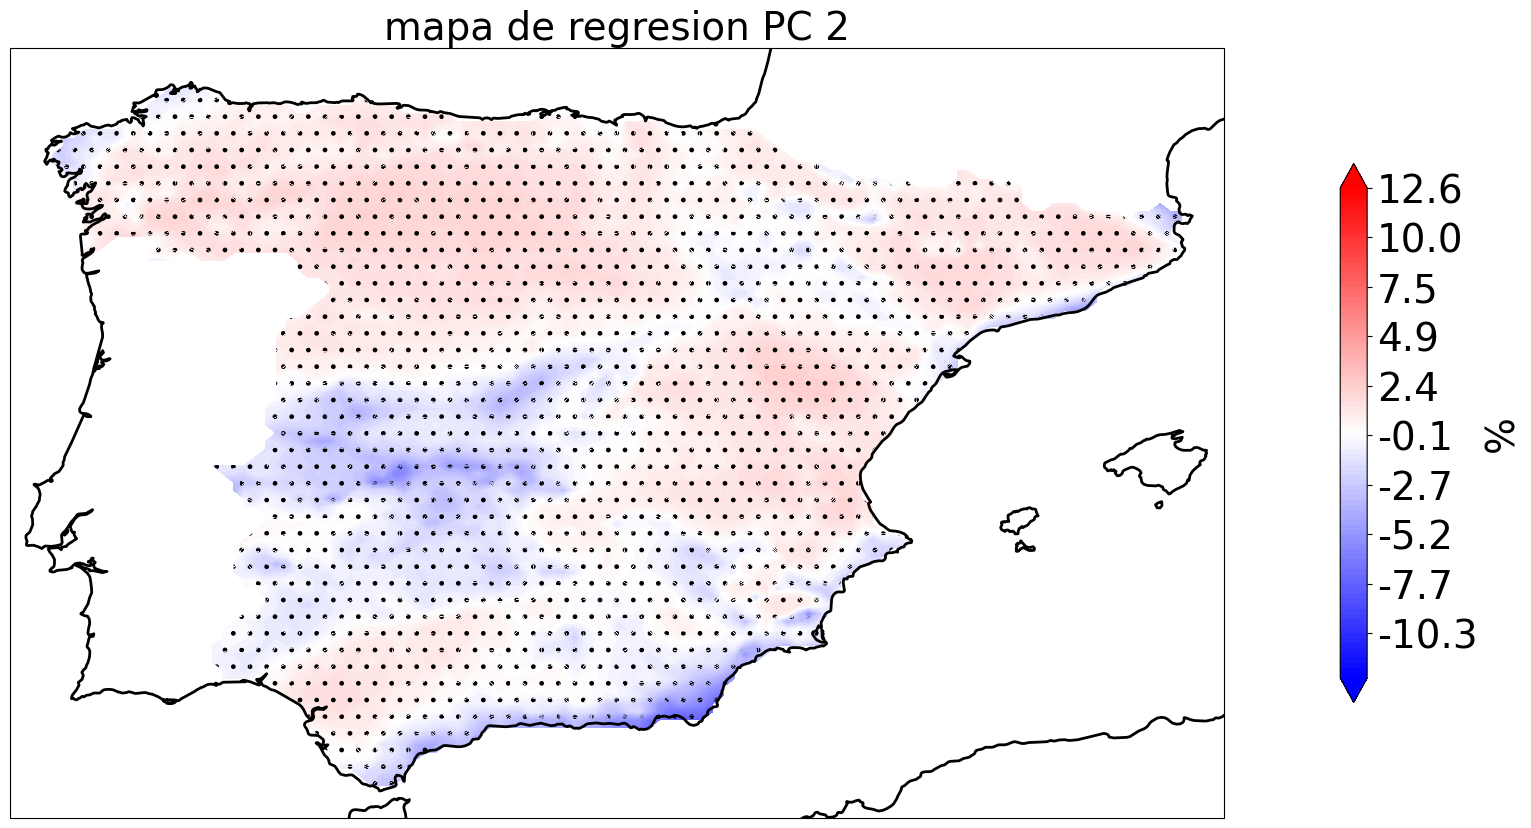

In [54]:
rango_reg=max(abs(np.nanmin(reg1_final)),abs(np.nanmax(reg1_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg2_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 2', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_2_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

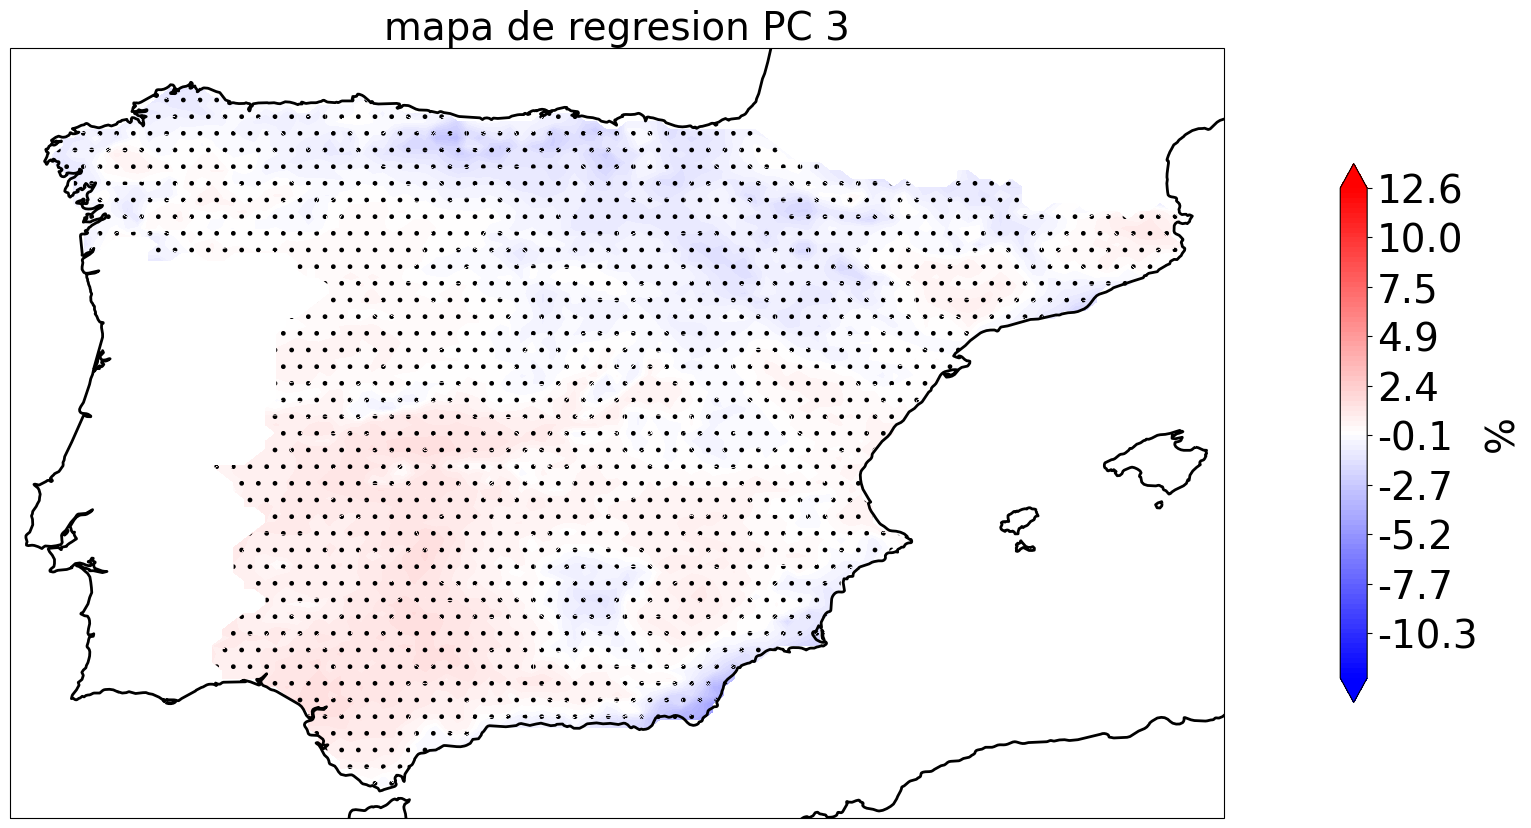

In [55]:
rango_reg=max(abs(np.nanmin(reg1_final)),abs(np.nanmax(reg1_final)))
levels=np.linspace(-rango_reg,rango_reg,100)

fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(reg3_final,(nlat,nlon)),lon,lat,levels,'bwr','%','mapa de regresion PC 3', ax)
ax.contourf(lon,lat,np.reshape(reg_sig_3_final,(nlat,nlon)),alfa=0,cmap='bwr',levels=levels,hatches='.')

Mapas de regresión de las PCS 2 y 3 usando la misma leyenda que para la PC1

In [56]:

tn10_remallado_prim_new=np.reshape(np.array(tn10_remallado_prim), (int(nt/3),3,nlat,nlon)).mean(axis=1)

In [57]:
yrs=np.linspace(1901,2014,114)
yrs

array([1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908., 1909.,
       1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917., 1918.,
       1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927.,
       1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936.,
       1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014.])

In [58]:
yr1974=tn10_primavera_anomalia[yrs==1974]

Text(0.5, 1.0, 'Anom 1974')

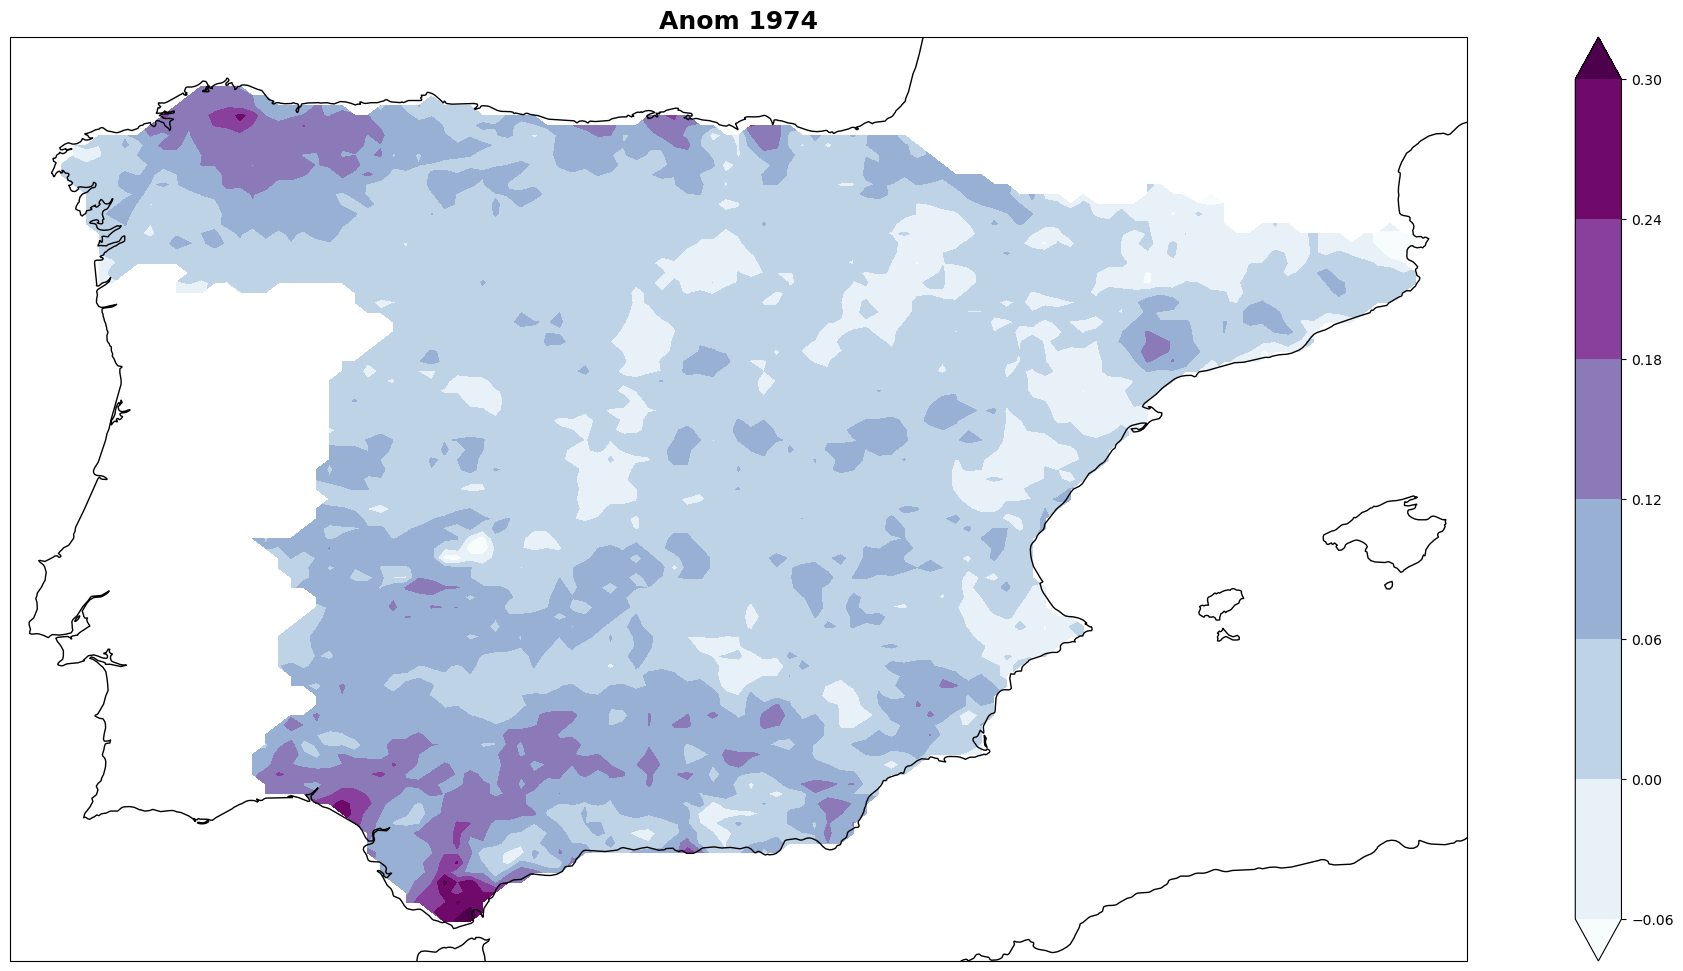

In [59]:

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,yr1974.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Anom 1974',fontsize=18,weight='bold')

In [60]:
yr1997=tn10_primavera_anomalia[yrs==1997]

In [61]:
tn10_primavera_anomalia.shape

(114, 95, 115)

In [62]:
yr1997.shape

(1, 95, 115)

Text(0.5, 1.0, 'Anom 1997')

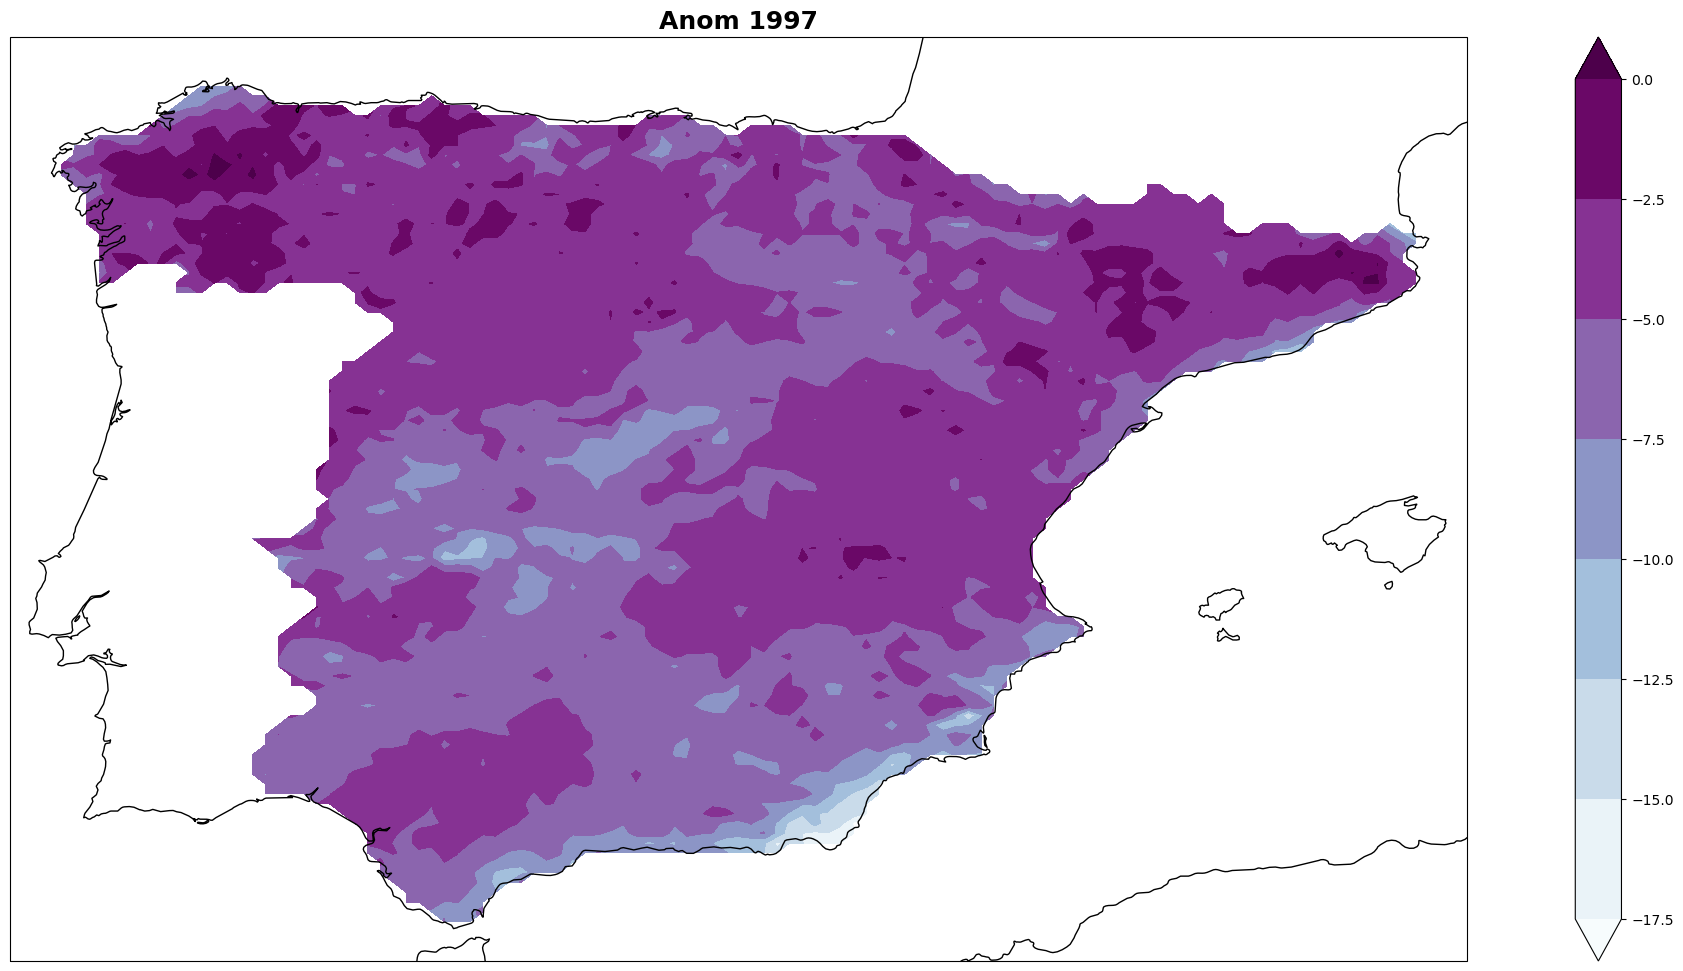

In [63]:


fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,yr1997.reshape(len(lat),len(lon)),cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Anom 1997',fontsize=18,weight='bold')

In [64]:
lon=tn10_remallado.lon
lat=tn10_remallado.lat


In [65]:
tn10_primavera_anomalia.shape

(114, 95, 115)

In [66]:
yr1984=tn10_primavera_anomalia[yrs==1984]

Text(0.5, 1.0, 'Anom yr1984')

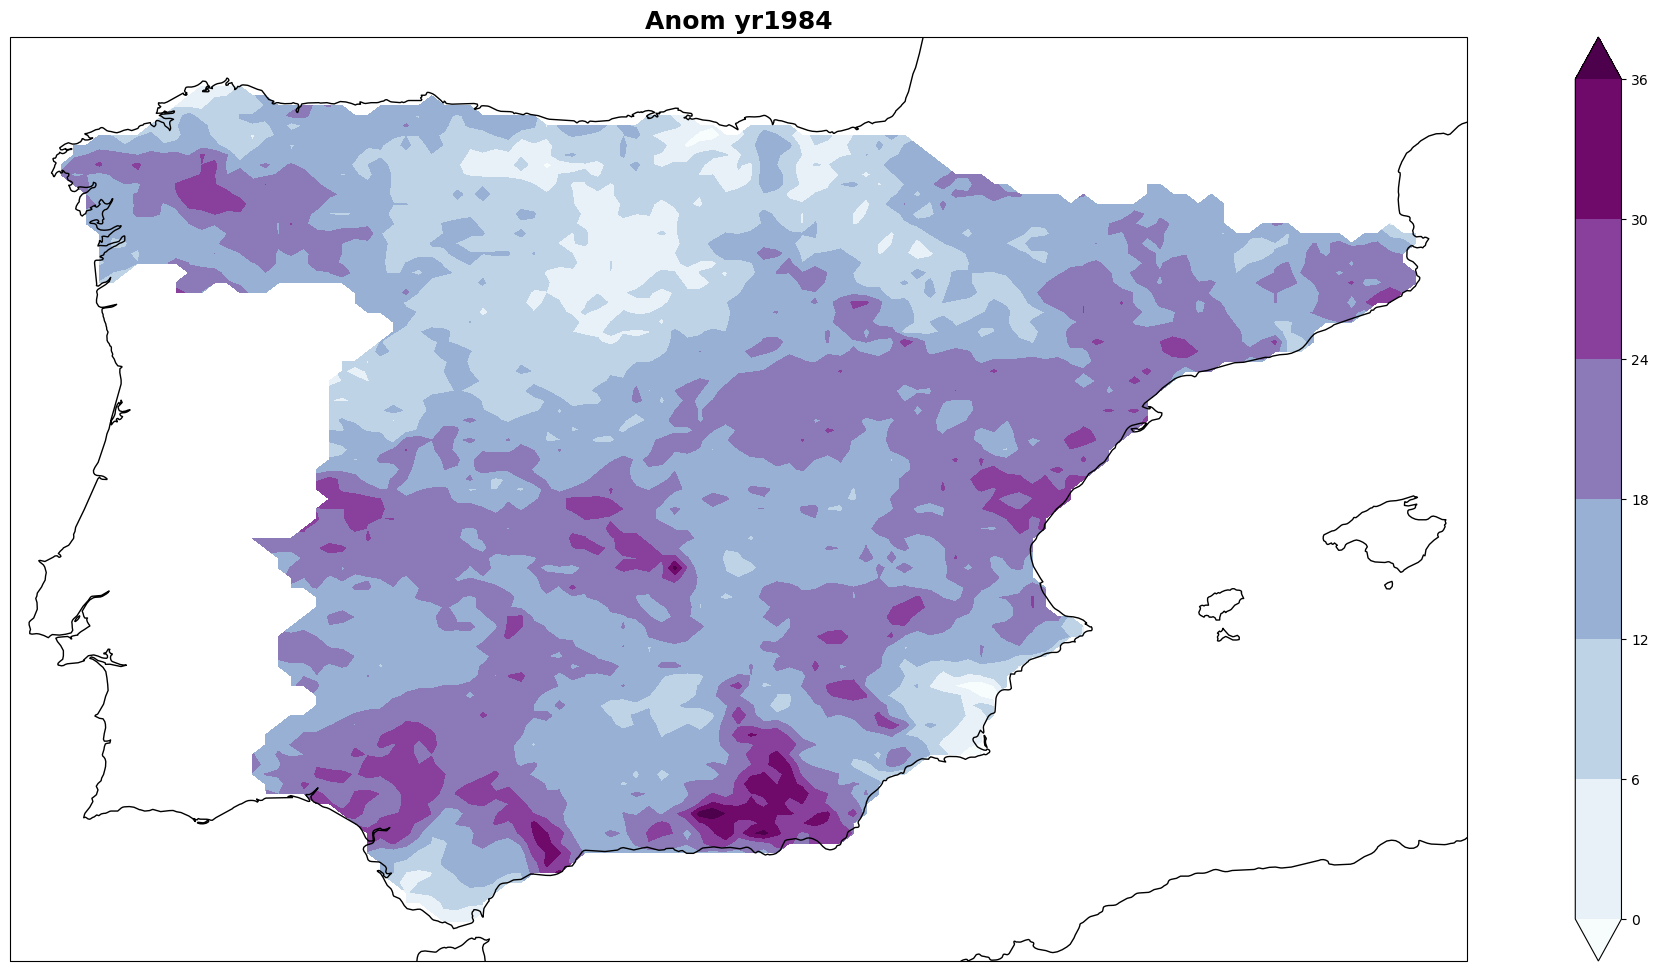

In [67]:
yr1984=tn10_primavera_anomalia[yrs==1984]

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,yr1984.reshape(len(lat),len(lon)),cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Anom yr1984',fontsize=18,weight='bold')

La primavera de 1997 fue una de las más cálidas regrista desde el 1961. Seguida de la del 2006, 2011 y 2014.

# MAPAS DE ANOMALÍA SLP PARA ESTAS DOS PRIMAVERAS 

In [68]:
path='/Users/barbo/Desktop/analisis multivariante/parte I/datos/'
file ='slp_ERA20_1900-2010.nc'
vari=xr.open_dataset(path+file)

In [69]:
lon = vari.longitude
lat = vari.latitude
SLP = vari.msl
nm = 12
nyears = int(vari.time.shape[0]/nm)

In [70]:
yrs=np.linspace(1900,2010,111)

In [71]:
yrs

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
       1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935.,
       1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944.,
       1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962.,
       1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971.,
       1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980.,
       1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010.])

In [72]:
def region(A,lon,lat,lonmin,lonmax,latmin,latmax):
    nt, nlat, nlon = A.shape
    #lonmin,lonmax,latmin,latmax = 260, 360, 10, 75
    AN = A[:,:,(lon>lonmin)&(lon<lonmax)][:,(lat>latmin)&(lat<latmax),:]
    lon_AN= lon[(lon>lonmin)&(lon<lonmax)]
    lat_AN=lat[(lat>latmin)&(lat<latmax)]
    return lat_AN, lon_AN, AN

In [73]:
lat_AN, lon_AN, AN=region(SLP,lon,lat, 260, 360, 10, 75)

In [74]:
AN_spring=AN.groupby('time.season')['MAM']

In [75]:
AN_spring_ano=AN_spring-AN_spring.mean(axis=0)

In [76]:
[nt,nlat,nlon]=AN_spring_ano.shape

In [77]:
AN_spring_ano=np.reshape(np.array(AN_spring_ano), (int(nt/3),3,nlat,nlon)).mean(axis=1)

In [78]:
ATN_winter_ano=np.reshape(AN_spring_ano,(111,nlat*nlon))


In [79]:
Y=ATN_winter_ano[yrs==1974]


Text(0.5, 1.0, 'Anomalía SLP primavera 1974')

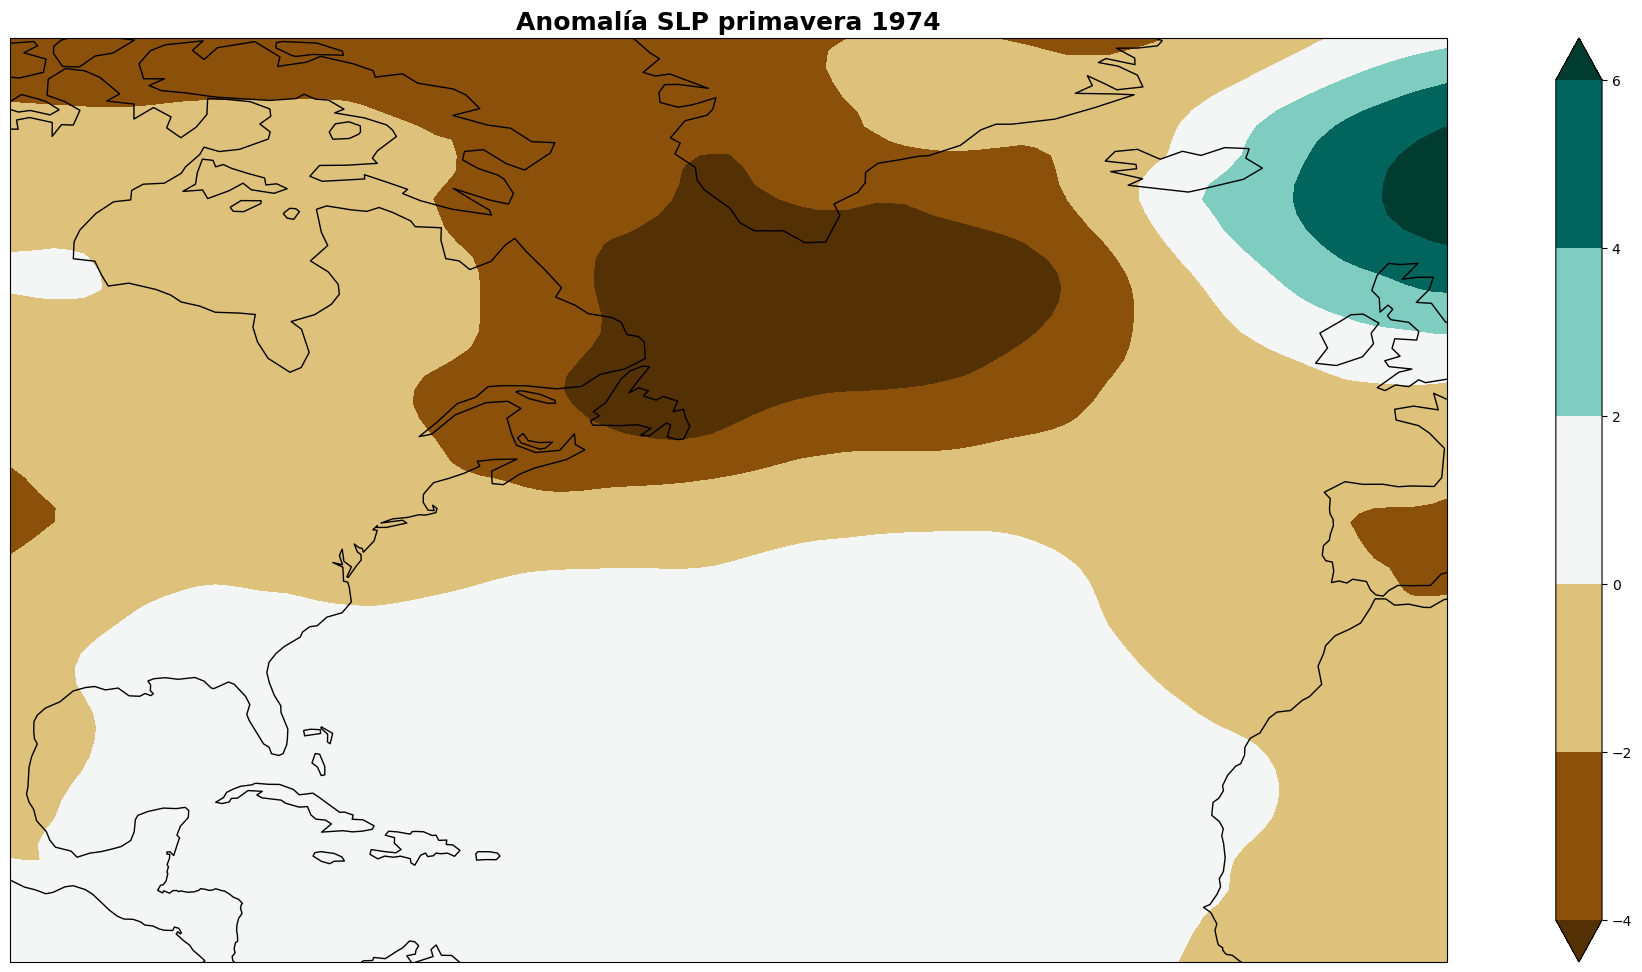

In [80]:
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon_AN,lat_AN,Y.reshape(len(lat_AN),len(lon_AN))/100,cmap='BrBG',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Anomalía SLP primavera 1974',fontsize=18,weight='bold')

In [81]:
Z=ATN_winter_ano[yrs==1997]

Text(0.5, 1.0, 'SLP 1997')

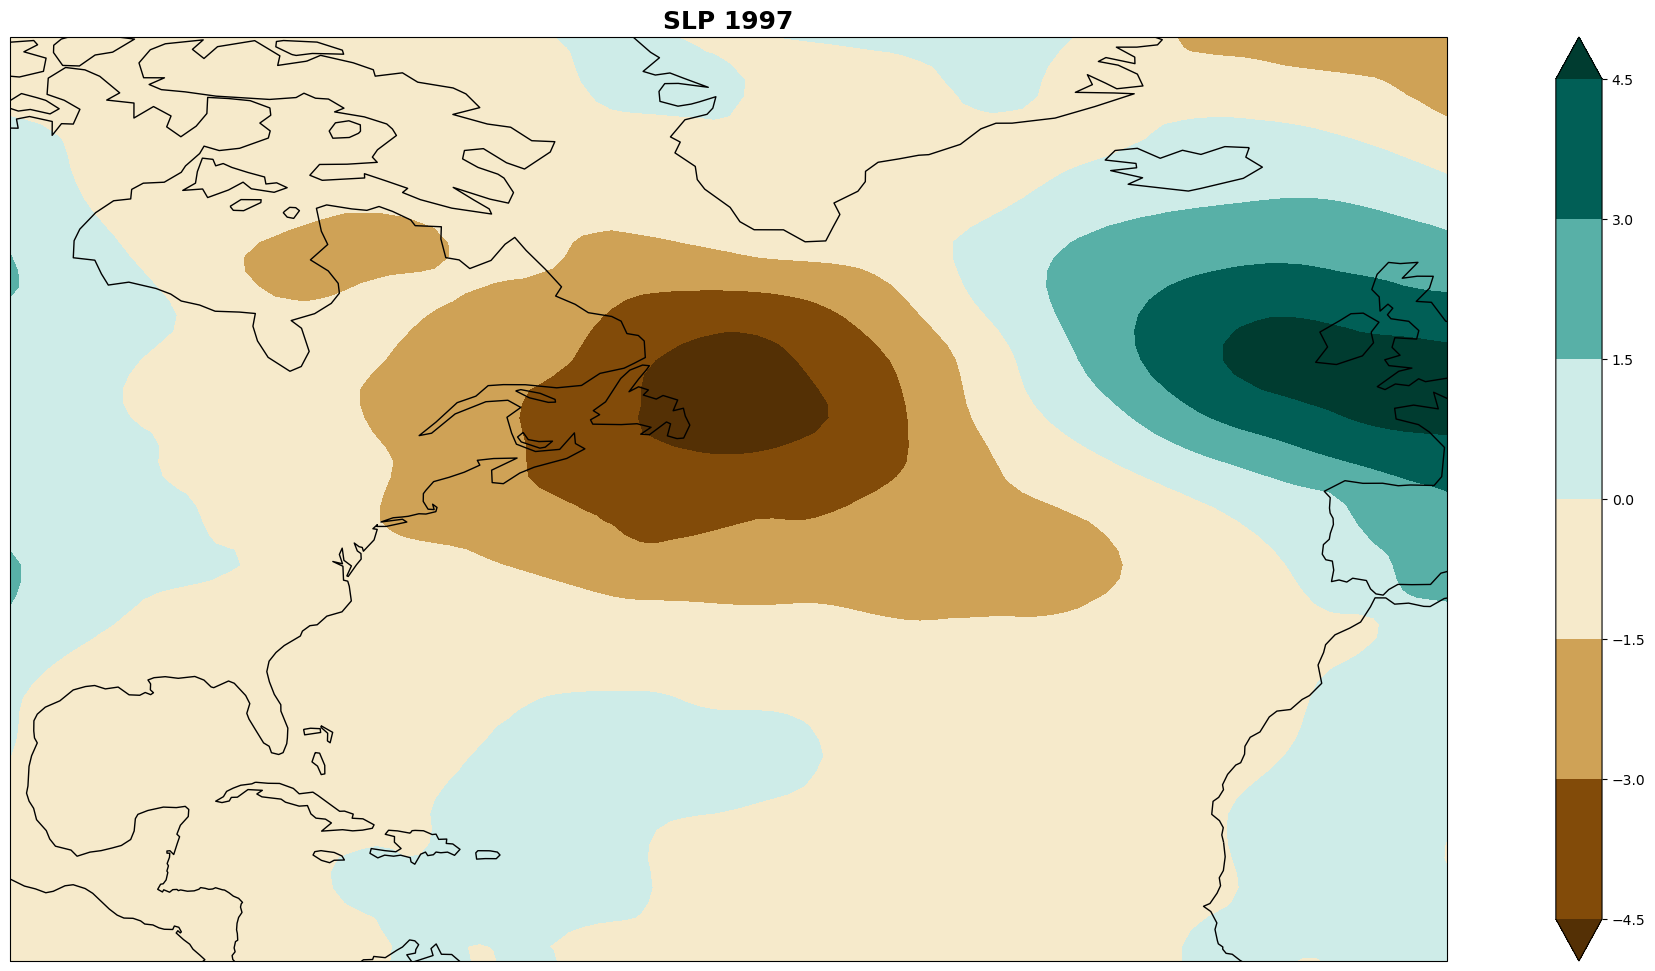

In [82]:
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon_AN,lat_AN,Z.reshape(len(lat_AN),len(lon_AN))/100,cmap='BrBG',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('SLP 1997',fontsize=18,weight='bold')

# Ahora represento la SST para el invierno y la primavera de esos años

In [113]:
def region2(data,lat,lon,lonmin,lonmax,latmin,latmax):
    # data[t,lon,lat]
    latc=lat[(lat>=latmin)&(lat<=latmax)]
    lonc=lon[(lon>=lonmin)&(lon<=lonmax)]
    datac = data[:,:,(lon>=lonmin)&(lon<=lonmax)][:,(lat>=latmin)&(lat<=latmax),:]
    return datac,latc,lonc

In [114]:
#Voy a usar los datos SST y SLP como en la practica 3
#Cargo los datos SST:
path='/Users/barbo/Desktop/analisis multivariante/parte I/datos/'
vari='HadISST1_sst_1870-2019.nc'
fil = xr.open_dataset(path+vari)
lon = fil.longitude
lat = fil.latitude
sst = fil.sst
nt, nlat, nlon = sst.shape
nm = 12
nyearssst = int(nt/nm)

lonmin,lonmax,latmin,latmax = -270, -70, -20, 20

SST,lat,lon=region2(sst,lat,lon,lonmin,lonmax,latmin,latmax)
yrsst=np.linspace(1870,2019,150)
SST=SST[:150*12,:,:]
SST=np.array(SST)
SST=np.reshape(SST, (150,12,len(lat),len(lon)))

In [115]:
# reorganizo los datos para que estén en numero de años, numero de meses y espacio
SST=np.reshape(SST, (len(yrsst),12,len(lon)*len(lat)))
#ahora calculo las medias estacionales, por ejemplo del mes 9 (octubre) al mes 1 (febrero)
# es decir tengo una estación extendida
SST_sea,ny1=season(SST,9,1,111)

SST_sea2,ny12=season(SST,2,4,111)

In [116]:

# Ahora voy a calcular las anomalias
#anomalías positivas en la SST nos van a indicar un evento de el niño

SST_sea_an=anom(np.transpose(SST_sea),1,'pp')

SST_sea_an2=anom(np.transpose(SST_sea2),1,'pp')

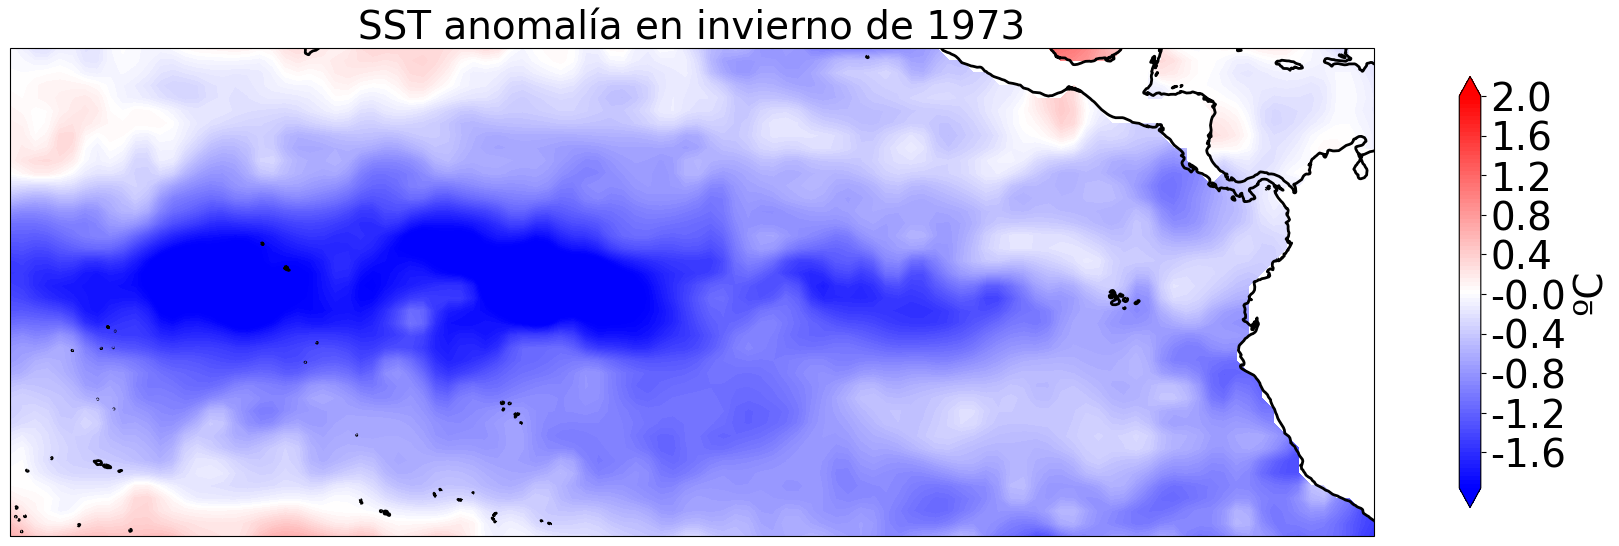

In [117]:
fig = plt.figure(figsize=(22,8)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(SST_sea_an[:,np.where(yrsst==1973)],(len(lat),len(lon))),lon,lat,np.linspace(-2,2,100), 'bwr', 'ºC','SST anomalía en invierno de 1973',ax)


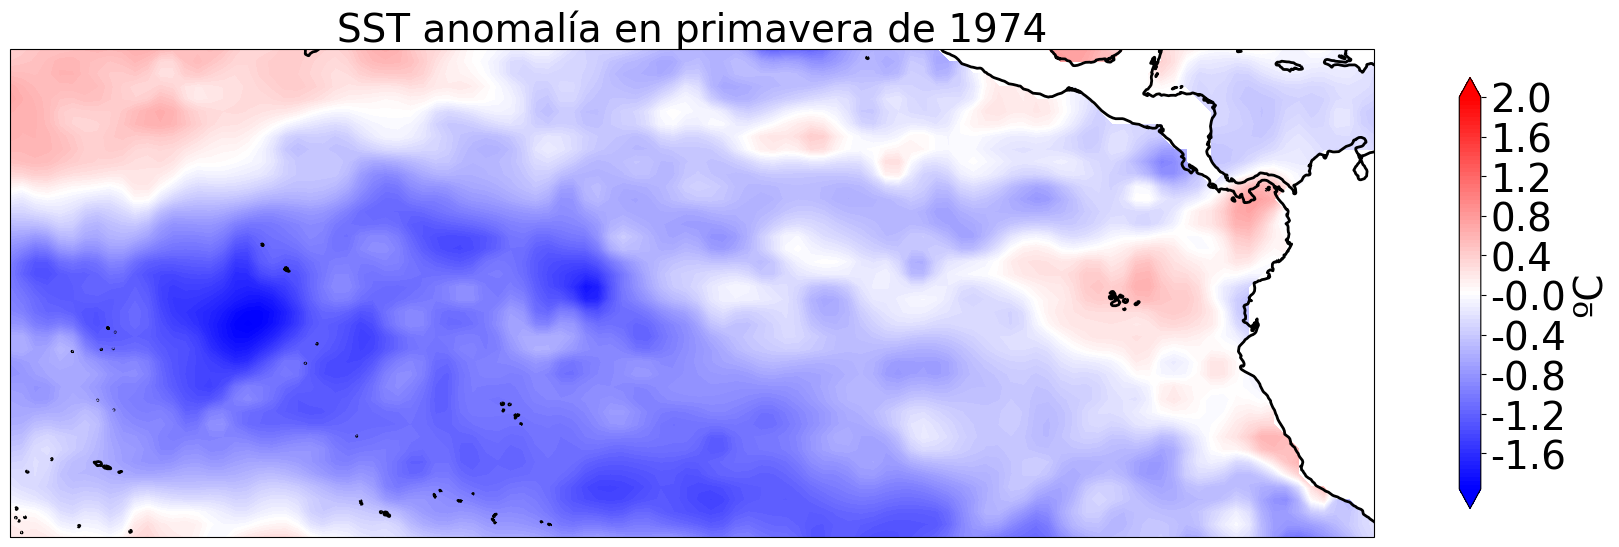

In [118]:
fig = plt.figure(figsize=(22,8)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(SST_sea_an2[:,np.where(yrsst==1974)],(len(lat),len(lon))),lon,lat,np.linspace(-2,2,100), 'bwr', 'ºC','SST anomalía en primavera de 1974',ax)


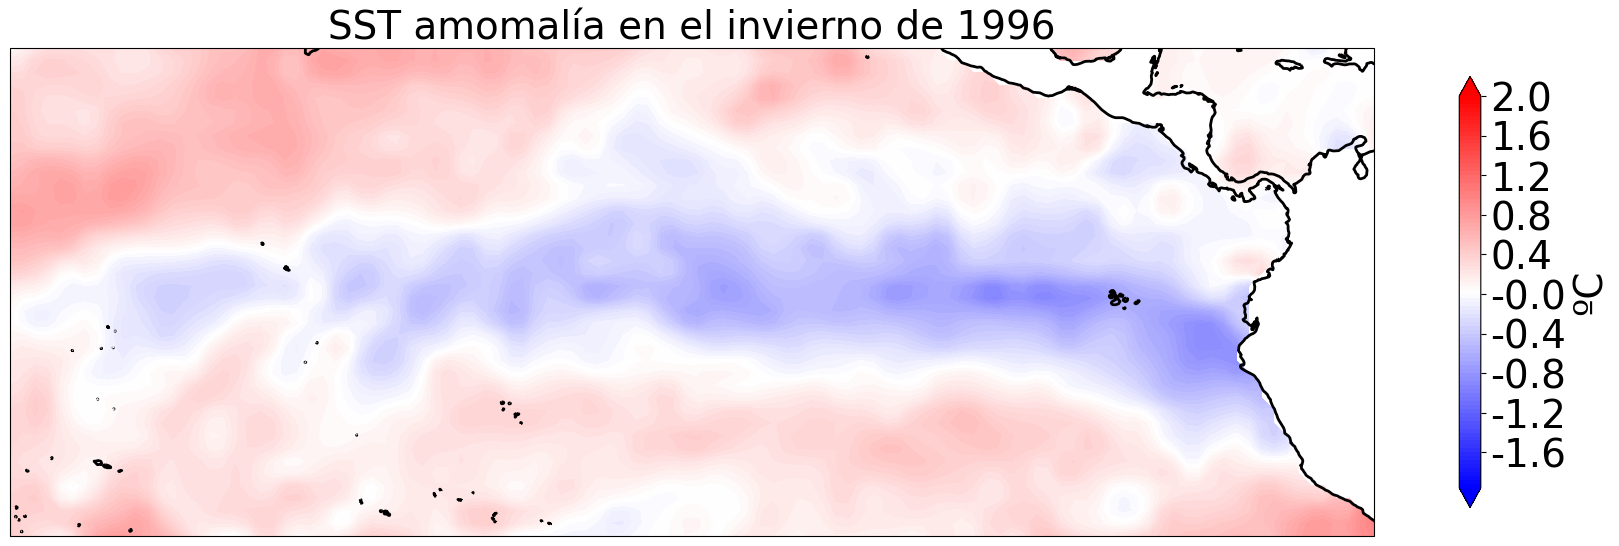

In [119]:
fig = plt.figure(figsize=(22,8)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(SST_sea_an[:,np.where(yrsst==1996)],(len(lat),len(lon))),lon,lat,np.linspace(-2,2,100), 'bwr', 'ºC','SST amomalía en el invierno de 1996',ax)


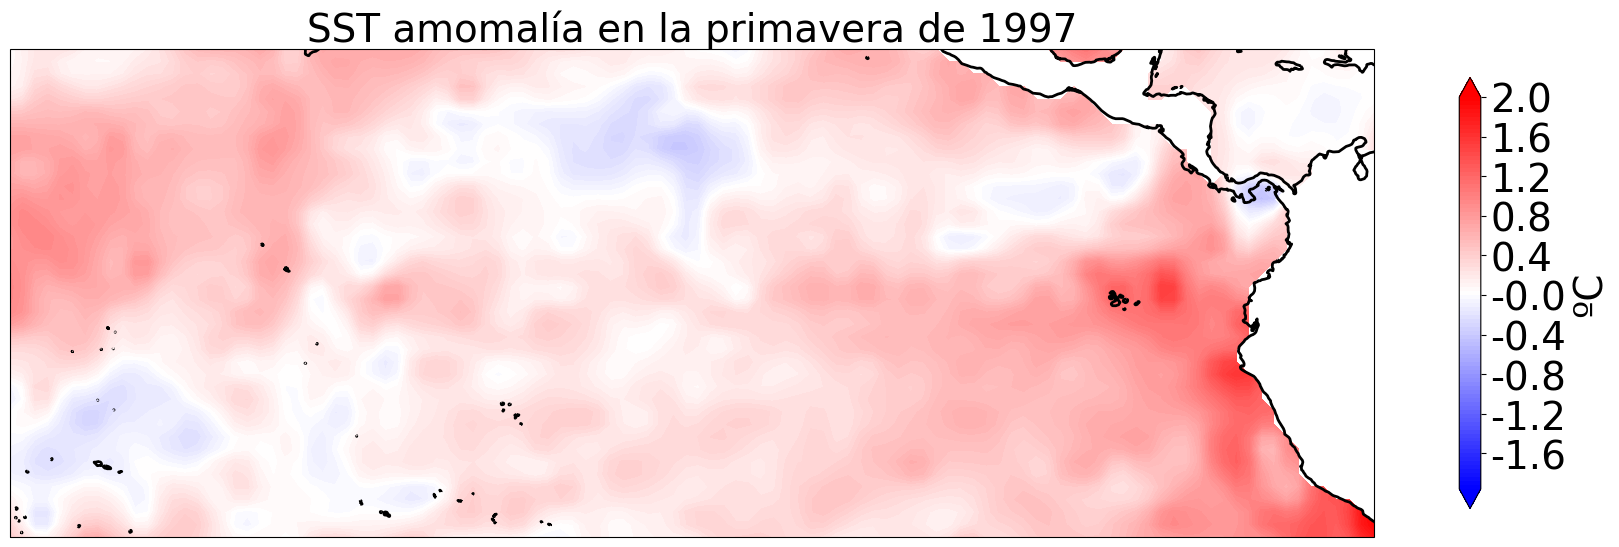

In [120]:
fig = plt.figure(figsize=(22,8)) 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
dibujo_1_mapa_cartopy(np.reshape(SST_sea_an2[:,np.where(yrsst==1997)],(len(lat),len(lon))),lon,lat,np.linspace(-2,2,100), 'bwr', 'ºC','SST amomalía en la primavera de 1997',ax)


# Reconstruir un campo

Los años 1974, por tratarse de un año frío y el año 1997 al registrar una de las primaveras más calurosas de los últimos años.

In [121]:
lon=tn10_remallado.lon
lat=tn10_remallado.lat

In [122]:
PC1s.shape

(114, 4)

In [123]:
yrss=np.linspace(1901,2014,114)


con esta parte selecciono directamente el año


In [124]:
PC1s[yrss==1974,0]

array([-1.71775447])

In [125]:
Yreconst1=reg1_final*PC1s[yrss==1974,0]

Text(0.5, 1.0, 'Reconstrucción del índice con PC1, año 1974')

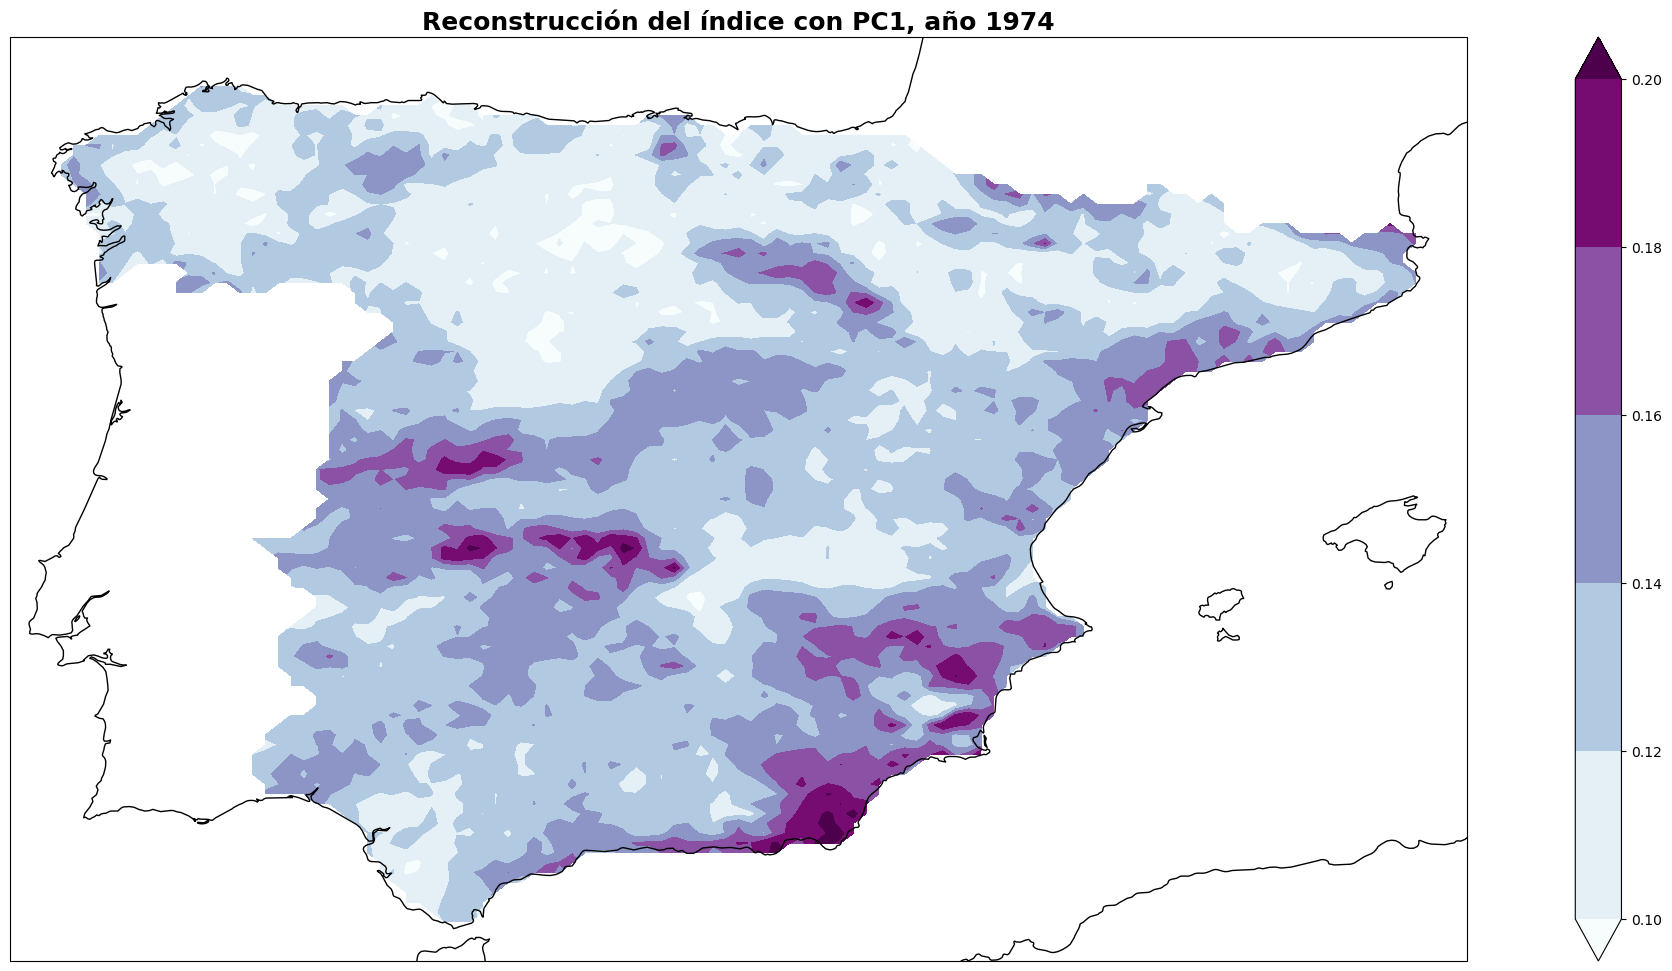

In [126]:
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst1.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1, año 1974',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Reconstrucción del índice con PC1, año 1997')

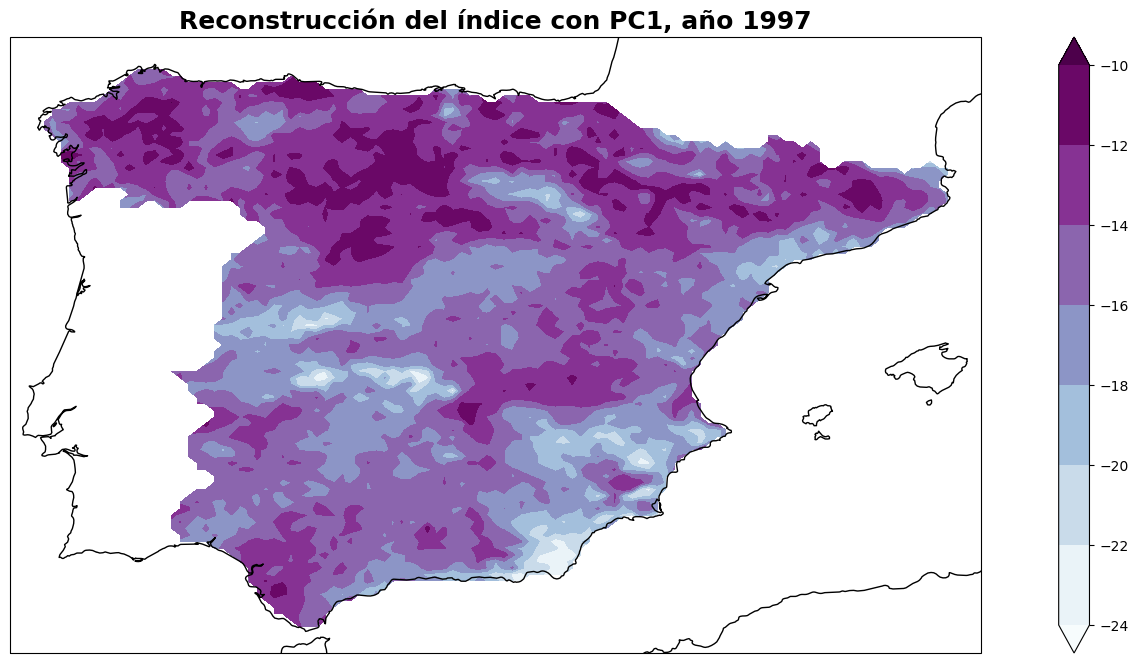

In [127]:
PC1s[yrss==1997,0]
Yreconst1_=reg1_final*(PC1s[yrss==1997,0])
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst1_.reshape(len(lat),len(lon)),cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1, año 1997',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Reconstrucción del índice con PC1+PC2+PC3, año 1997')

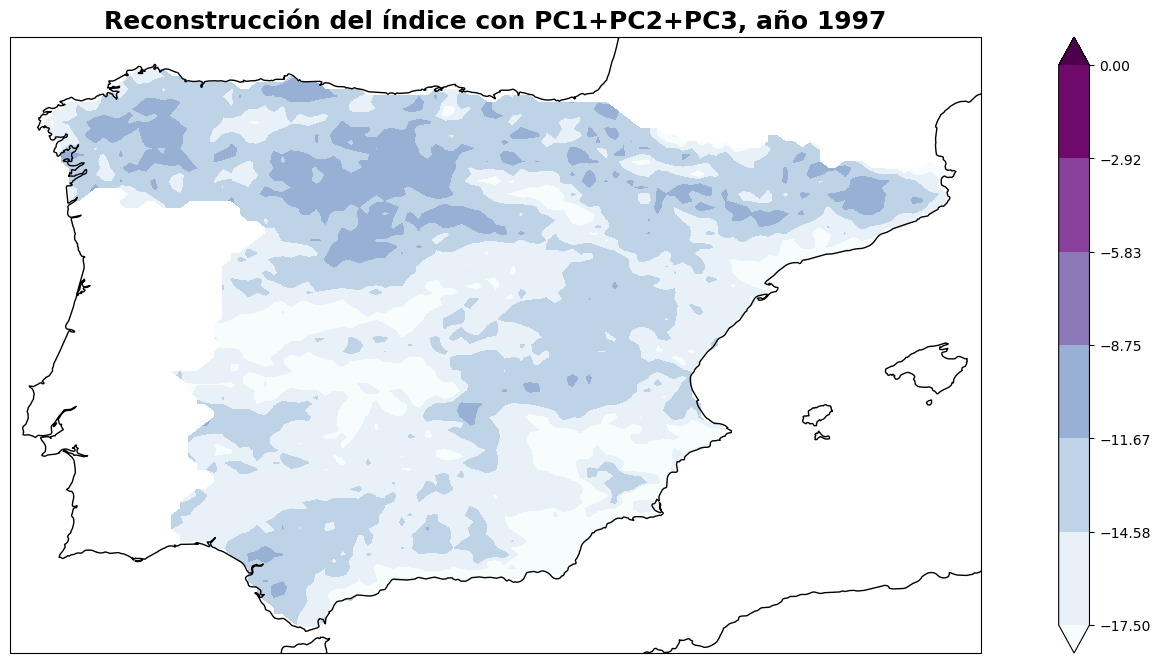

In [128]:
PC1s[yrss==1997,0]
levels=np.linspace(-17.5,0,7)
Yreconst1_=reg1_final*PC1s[yrss==1997,0]+reg2_final*PC1s[yrss==1997,1]+reg3_final*PC1s[yrss==1997,2]
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst1_.reshape(len(lat),len(lon)),cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree(), levels=levels)
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1+PC2+PC3, año 1997',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Reconstrucción del índice con PC1+PC2+PC3 (divididas entre 3), año 1984')

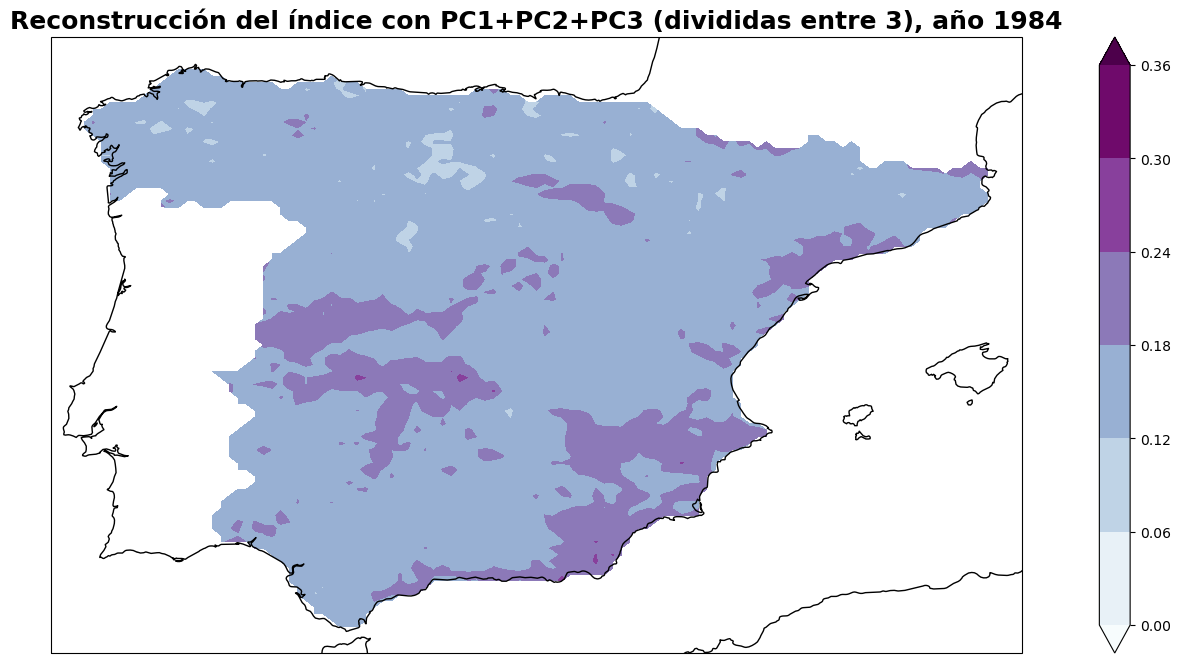

In [129]:
rr= PC1s[yrss==1984,0]/3
levels=np.linspace(0,0.36,7)
Yreconst_1983=reg1_final*(PC1s[yrss==1984,0]/3)+reg2_final*(PC1s[yrss==1984,1]/3)+reg3_final*(PC1s[yrss==1984,2]/3)
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst_1983.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree(), levels=levels)
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1+PC2+PC3 (divididas entre 3), año 1984',fontsize=18,weight='bold')

esto es lo mismo pero en vez de seleccionar el año busco el pico para el que la pc es -6

In [131]:
pico_P1=np.where(PC1s[:,0]<-6)[0][0]

In [132]:
Y=tn10_primavera_anomalia[pico_P1]
pico_P1
Y.shape

(95, 115)

In [133]:
PC1s[pico_P1,0]

-6.245565798551498

In [134]:
reg1_final.shape

(95, 115)

In [135]:
Yreconst2=reg1_final*PC1s[pico_P1,0]/3
Yreconst2.shape

(95, 115)

In [136]:
Yreconst2_resh=np.reshape(Yreconst2,(len(lat),len(lon)))

Text(0.5, 1.0, 'tn10 primavera reconstruida con PC1')

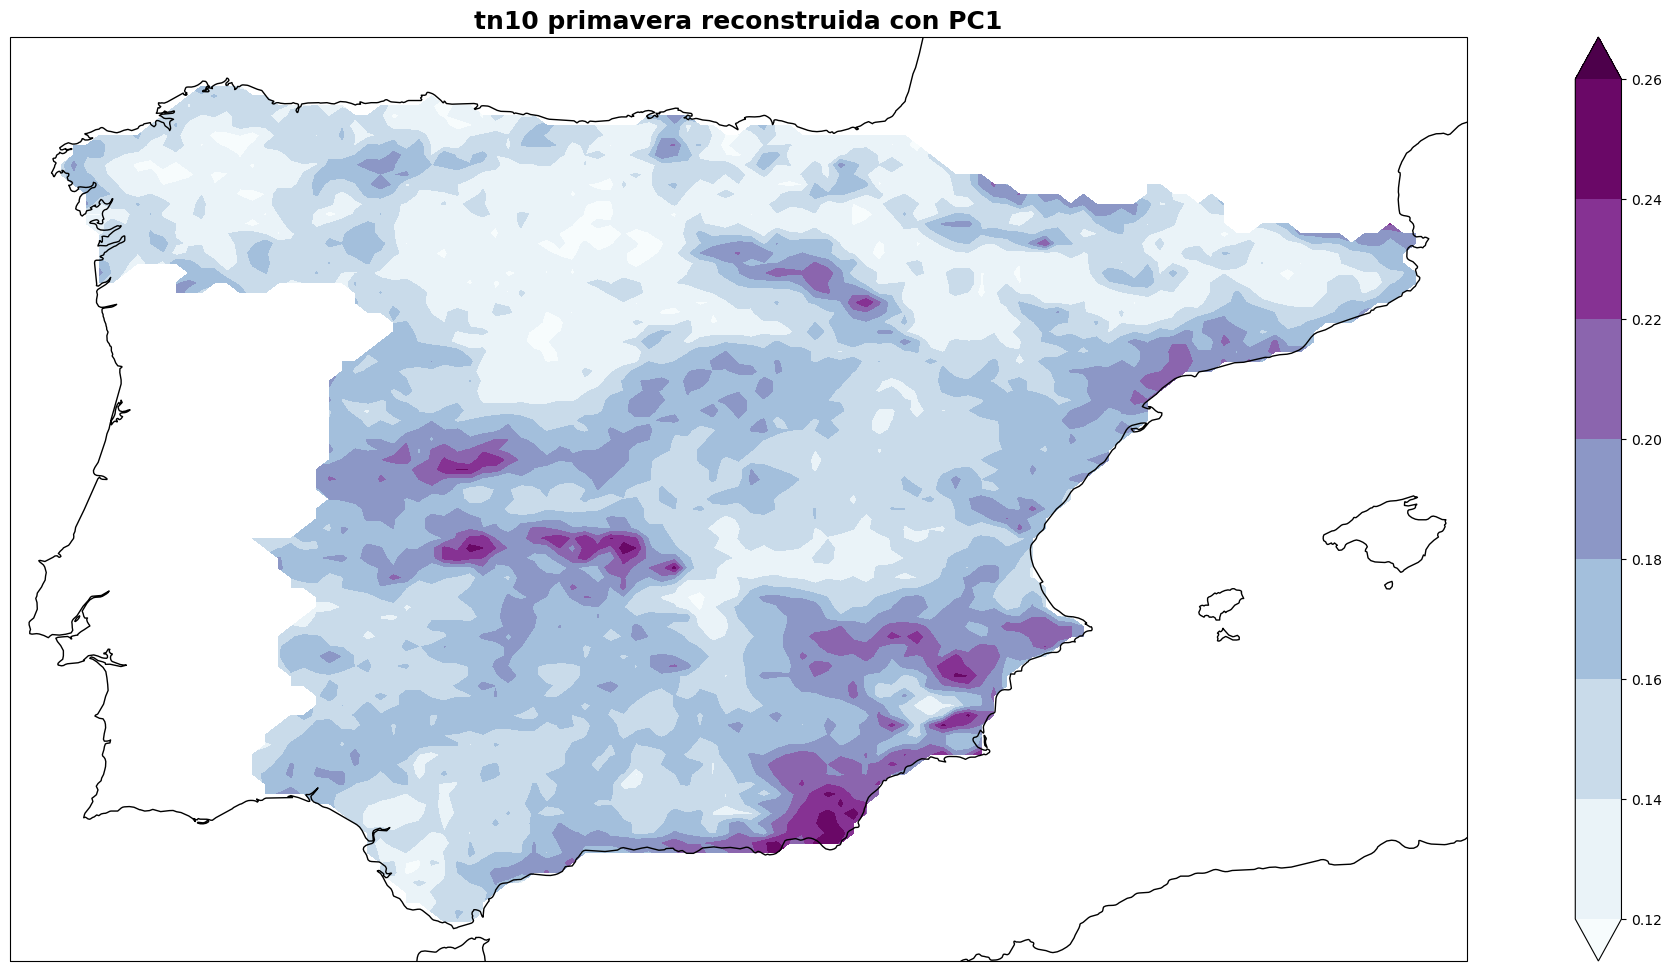

In [137]:
#recontruimos con 1 modo

fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))

im = ax.contourf(lon,lat,Yreconst2_resh/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('tn10 primavera reconstruida con PC1',fontsize=18,weight='bold')

Text(0.5, 1.0, 'tn10 primavera reconstruida con PC1+PC2+PC3')

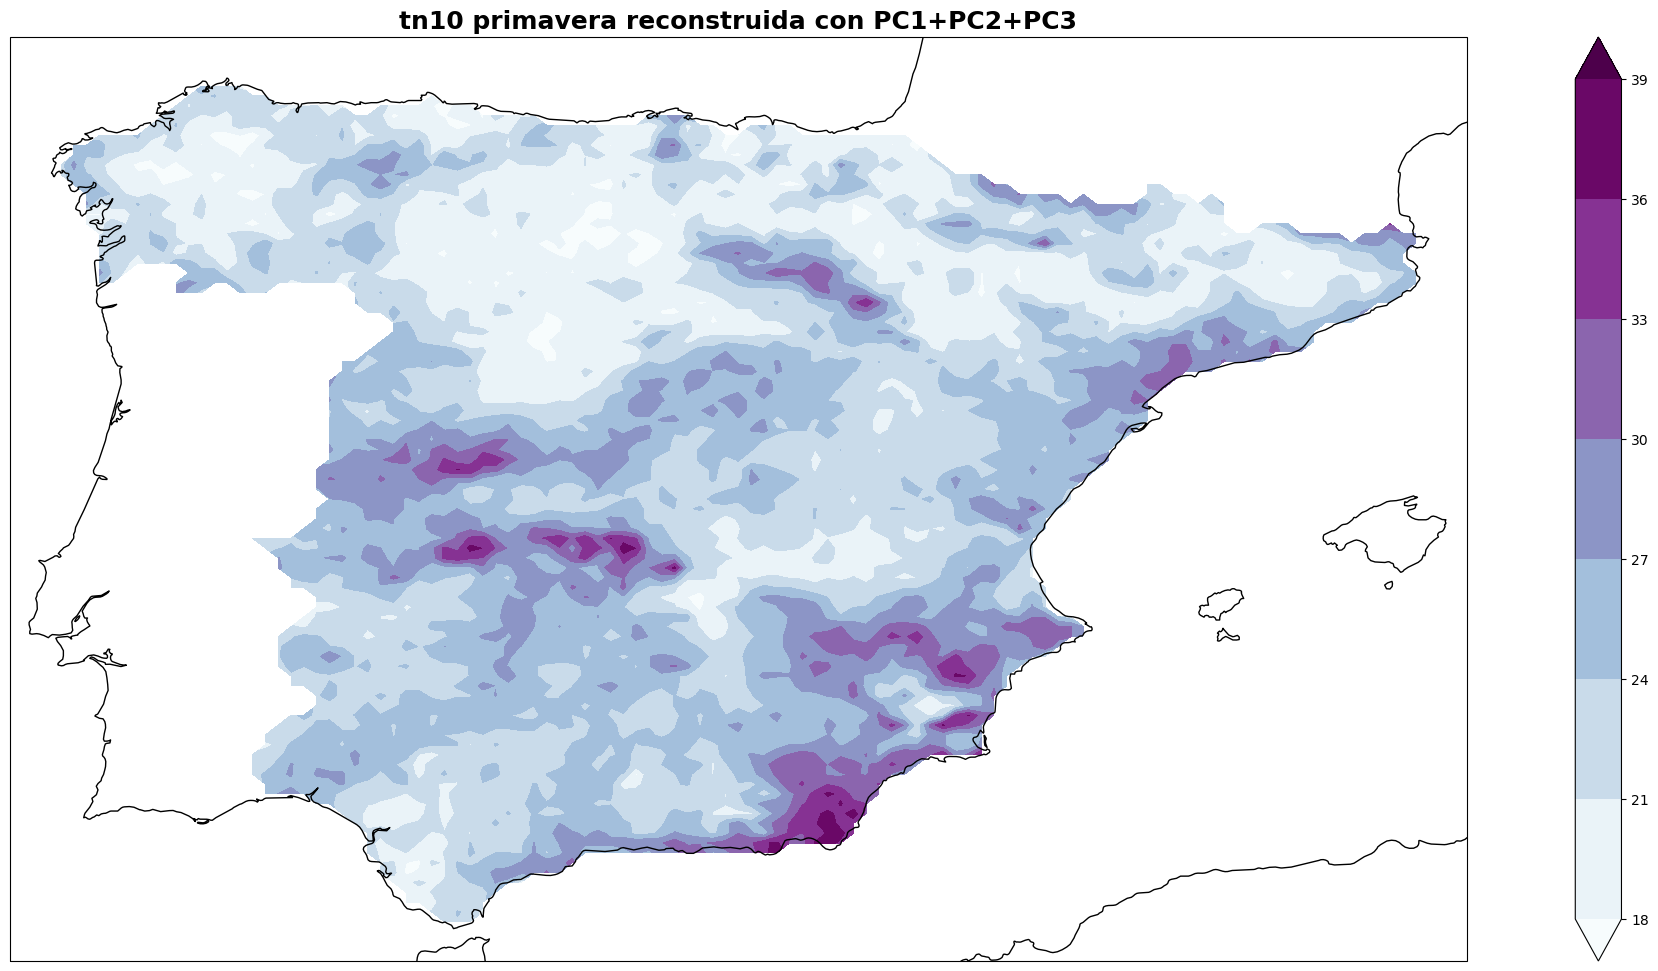

In [138]:
#recontruimos con 3 modos
levels=np.linspace(0,36,7)

Yreconst3=reg1_final*(PC1s[pico_P1,0]/2)+reg2_final*(PC1s[pico_P1,1]/2)
fig = plt.figure(figsize=(28,12)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))

im = ax.contourf(lon,lat,Yreconst3.reshape(len(lat),len(lon)),cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('tn10 primavera reconstruida con PC1+PC2+PC3',fontsize=18,weight='bold')

Text(0.5, 1.0, 'tn10 primavera reconstruida con PC1+PC2+PC3')

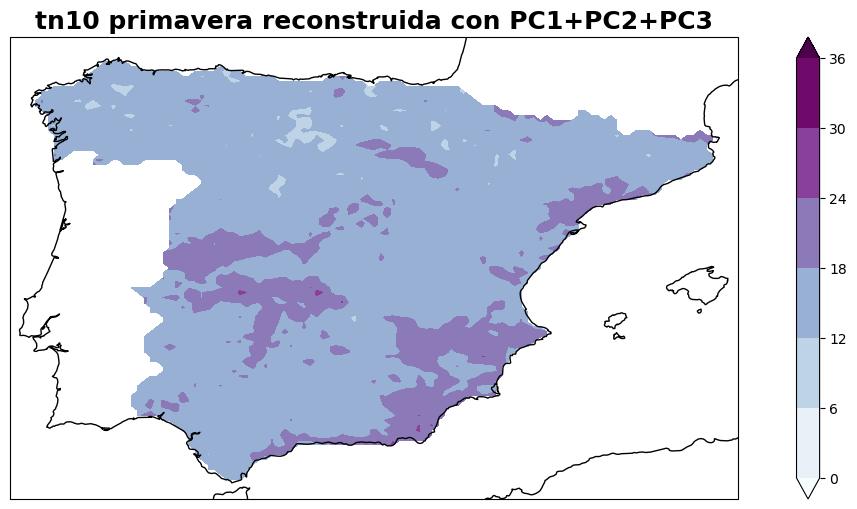

In [139]:
levels=np.linspace(0,36,7)

Yreconst3=reg1_final*(PC1s[pico_P1,0]/3)+reg2_final*(PC1s[pico_P1,1]/3)+reg3_final*(PC1s[pico_P1,2]/3)
fig = plt.figure(figsize=(15,6)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))

im = ax.contourf(lon,lat,Yreconst3.reshape(len(lat),len(lon)),cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree(), levels=levels)
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('tn10 primavera reconstruida con PC1+PC2+PC3',fontsize=18,weight='bold')

Text(0.5, 1.0, 'Reconstrucción del índice con PC1, año 1997')

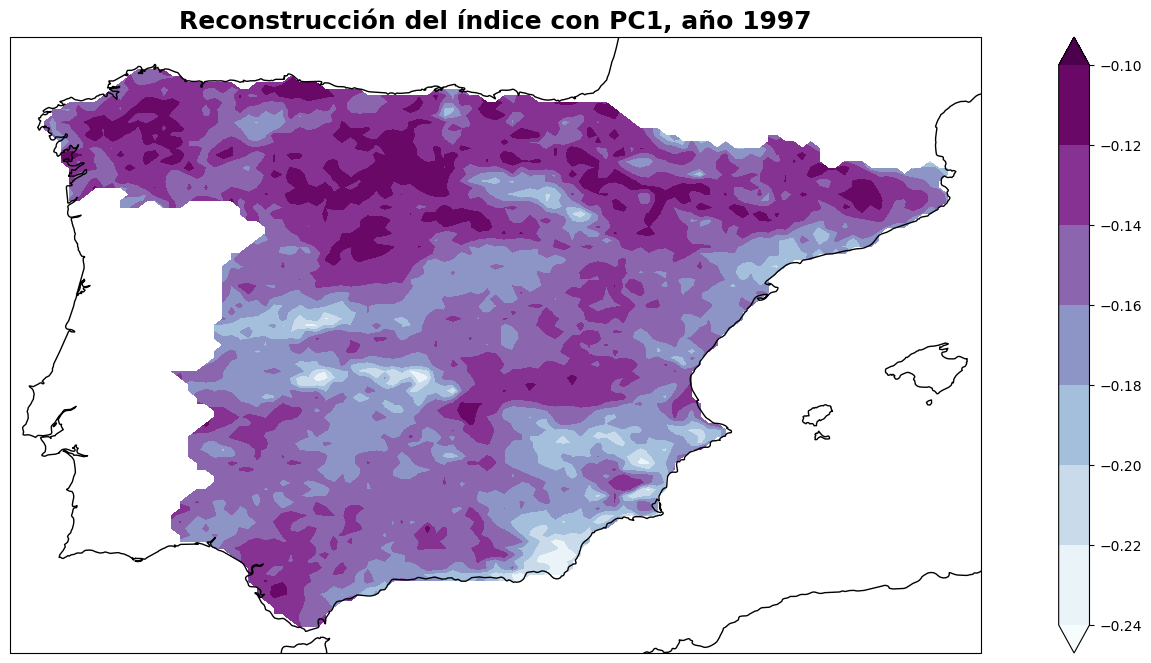

In [140]:
PC1s[yrss==1997,0]
Yreconst1_=reg1_final*PC1s[yrss==1997,0]
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))
im = ax.contourf(lon,lat,Yreconst1_.reshape(len(lat),len(lon))/100,cmap='BuPu',extend='both'
               ,transform = ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im,ax=ax) #Para la barra de colores
ax.set_title('Reconstrucción del índice con PC1, año 1997',fontsize=18,weight='bold')

### ¿Cómo se relacionan las EOFs con los índices de las diferntes regiones y con los índices de El Niño, la NAO, y las PCS de la SST y la SLP?

In [142]:
path='/Users/barbo/Desktop/analisis multivariante/parte I/datos/'
file ='slp_ERA20_1900-2010.nc'
vari=xr.open_dataset(path+file)
vari

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 181, time: 1332)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2010-12-01
Data variables:
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-01-20 17:20:20 GMT by grib_to_netcdf-2.0.2: grib_to_ne...

In [143]:
Azores= [35, 335] #Ponta Delgada (São Miguel)
Islandia= [64.136319, 360-21.948231] #Reyjavick (o como se escriba)
escala= 1/100 #para tener la presión en hPa
Azores_point= vari.msl.sel(latitude=Azores[0],longitude=Azores[1],method='nearest')*escala
Islandia_point= vari.msl.sel(latitude=Islandia[0],longitude=Islandia[1],method='nearest')*escala
tiempo= vari.time

In [144]:
#ahora tomamos la anomalía estandarizada de presión entre estas dos estaciones
diferencia_presion= Azores_point-Islandia_point
#NAO= (diferencia_presion- diferencia_presion.mean())/diferencia_presion.std()
#hacemos la media y std por meses
NAO=((diferencia_presion.groupby('time.month')-diferencia_presion.groupby('time.month').mean('time'))).groupby('time.month')/diferencia_presion.groupby('time.month').std('time')
NAO

<xarray.DataArray 'msl' (time: 1332)>
array([ 0.74976099, -1.09638641, -1.86762482, ..., -0.22634874,
       -1.13392175, -2.87750959])
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2010-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [145]:
TIEMPO = tiempo.indexes['time'].normalize()
TIEMPO

DatetimeIndex(['1900-01-01', '1900-02-01', '1900-03-01', '1900-04-01',
               '1900-05-01', '1900-06-01', '1900-07-01', '1900-08-01',
               '1900-09-01', '1900-10-01',
               ...
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', name='time', length=1332, freq='MS')

<BarContainer object of 1332 artists>

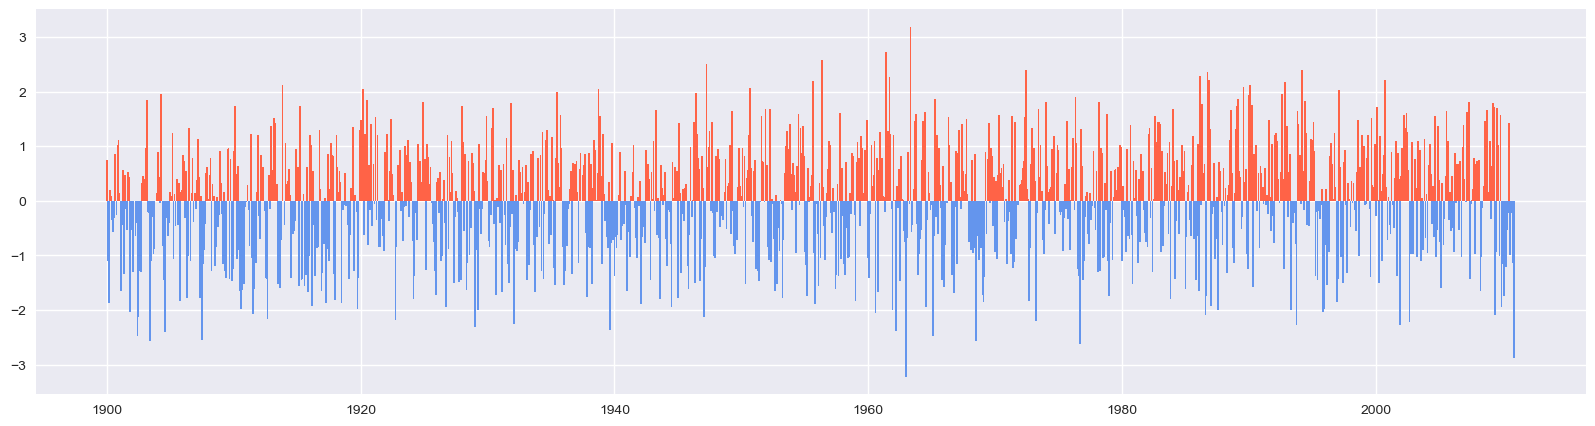

In [146]:
plt.style.use('seaborn')
fig, ax= plt.subplots(figsize=(20,5))
ax.bar(tiempo.indexes['time'].normalize(),NAO,width=50,color=np.where(NAO>0,'tomato','cornflowerblue'))


In [147]:
path='/Users/barbo/Desktop/analisis multivariante/parte I/datos/'
vari='HadISST1_sst_1870-2019.nc'
fil_sst = xr.open_dataset(path+vari)

In [148]:
lon_nino= [-150,-90]
lat_nino= [5,-5]


nino_3_region= fil_sst.sel(latitude=slice(lat_nino[0],lat_nino[1]),longitude=slice(lon_nino[0],lon_nino[1]))
#calculamos la media espacial de SST para cada tiempo y calculamos la anomalía
nino_3= nino_3_region.sst.mean(axis=(1,2))
nino_3_region

<xarray.Dataset>
Dimensions:    (longitude: 60, latitude: 10, time: 1800)
Coordinates:
  * longitude  (longitude) float32 -149.5 -148.5 -147.5 ... -92.5 -91.5 -90.5
  * latitude   (latitude) float32 4.5 3.5 2.5 1.5 0.5 -0.5 -1.5 -2.5 -3.5 -4.5
  * time       (time) datetime64[ns] 1870-01-16T12:00:00 ... 2019-12-16T12:00:00
Data variables:
    sst        (time, latitude, longitude) float32 26.08 26.04 ... 23.08 23.12
Attributes:
    CDI:                        Climate Data Interface version 1.7.0rc4 (http...
    Conventions:                CF-1.0
    history:                    Thu Sep 10 13:01:22 2020: cdo setmissval,-100...
    source:                     HadISST
    institution:                Met Office Hadley Centre
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...
    CDO:                        Climate Data Operators version 1.7.0rc6 (http...

In [149]:
ANOMALIA_nino_3= ((nino_3.groupby('time.month')-nino_3.groupby('time.month').mean('time'))).groupby('time.month')/nino_3.groupby('time.month').std('time')
ANOMALIA_nino_3

<xarray.DataArray 'sst' (time: 1800)>
array([-1.31801861, -1.37176839, -0.87842486, ...,  0.23864259,
        0.56651978,  0.34075136])
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2019-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [150]:
invierno_nino= ANOMALIA_nino_3.groupby('time.season')['DJF']
primavera_nino= ANOMALIA_nino_3.groupby('time.season')['MAM']
verano_nino= ANOMALIA_nino_3.groupby('time.season')['JJA']
otono_nino= ANOMALIA_nino_3.groupby('time.season')['SON']

invierno_NAO= NAO.groupby('time.season')['DJF']
primavera_NAO= NAO.groupby('time.season')['MAM']
verano_NAO= NAO.groupby('time.season')['JJA']
otono_NAO= NAO.groupby('time.season')['SON']

In [151]:
invierno_NAO_red= invierno_NAO[(invierno_NAO.time.dt.year<=2000)&(invierno_NAO.time.dt.year>=1985)]
primavera_NAO_red= primavera_NAO[(primavera_NAO.time.dt.year<=2000)&(primavera_NAO.time.dt.year>=1985)]
verano_NAO_red= verano_NAO[(verano_NAO.time.dt.year<=2000)&(verano_NAO.time.dt.year>=1985)]
otono_NAO_red= otono_NAO[(otono_NAO.time.dt.year<=2000)&(otono_NAO.time.dt.year>=1985)]

invierno_nino_red= invierno_nino[(invierno_nino.time.dt.year<=2000)&(invierno_nino.time.dt.year>=1985)]
primavera_nino_red= primavera_nino[(primavera_nino.time.dt.year<=2000)&(primavera_nino.time.dt.year>=1985)]
verano_nino_red= verano_nino[(verano_nino.time.dt.year<=2000)&(verano_nino.time.dt.year>=1985)]
otono_nino_red= otono_nino[(otono_nino.time.dt.year<=2000)&(otono_nino.time.dt.year>=1985)]

In [153]:
import matplotlib.dates as mdates

<AxesSubplot:title={'center':'Índices del Niño 3 y la NAO para otoño'}>

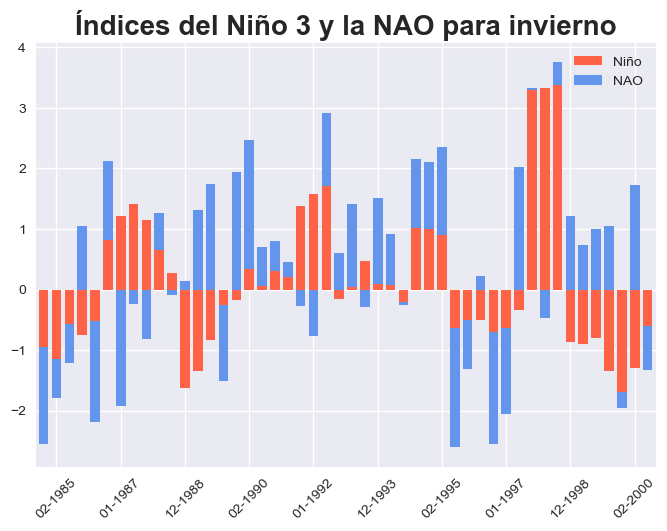

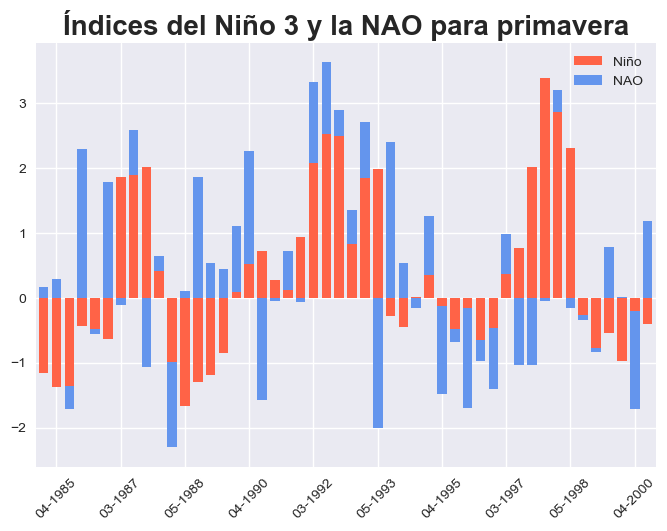

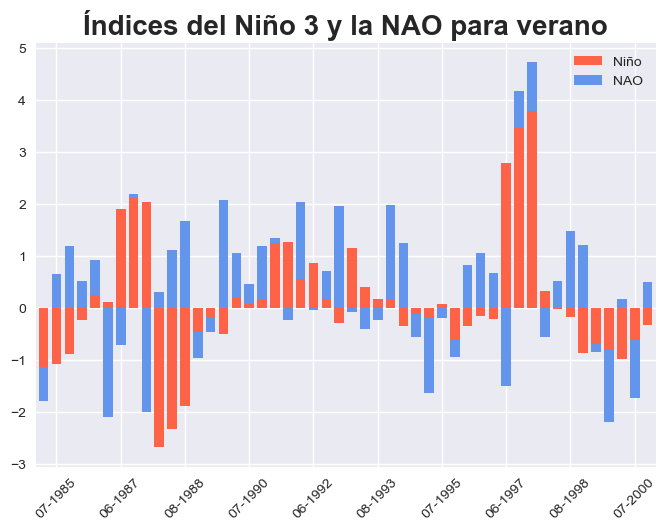

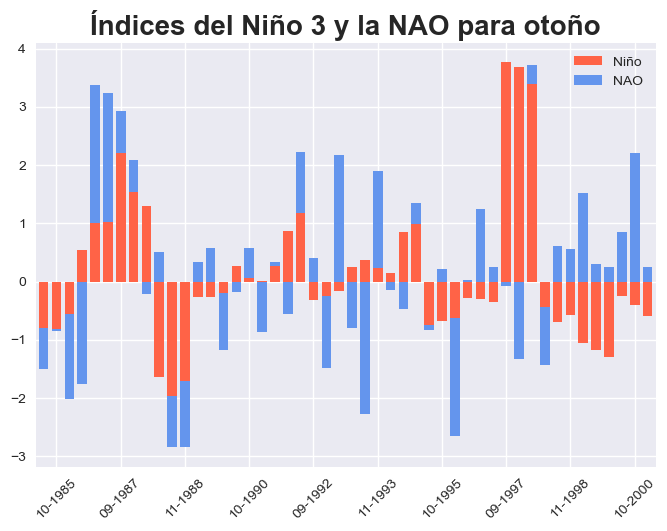

In [154]:
def data_arrays_topandasbarplot(niño,nao,estacion):
    testdata = pd.DataFrame({'Niño':niño, 'NAO':nao},index=pd.to_datetime(niño.time))
    testdata.index = [d.strftime("%m-%Y") for d in testdata.index]
    ax= testdata.plot.bar(rot=45,color={"Niño": "tomato", "NAO": "cornflowerblue"},width=0.75,stacked='True')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax.set_title('Índices del Niño 3 y la NAO para '+str(estacion),size=20,weight='bold')
    return ax

data_arrays_topandasbarplot(invierno_nino_red,invierno_NAO_red,'invierno')
data_arrays_topandasbarplot(primavera_nino_red,primavera_NAO_red,'primavera')
data_arrays_topandasbarplot(verano_nino_red,verano_NAO_red,'verano')
data_arrays_topandasbarplot(otono_nino_red,otono_NAO_red,'otoño')

In [155]:
#veamos si mi indice DE EL NIÑO EN PRIMAVERA se parece a la eof
primavera_nino_red= primavera_nino[(primavera_nino.time.dt.year<=2000)&(primavera_nino.time.dt.year>=1985)]
primavera_nino_red_reshape=np.reshape(np.asarray(primavera_nino_red),(int(primavera_nino_red.shape[0]/3),3)).mean(axis=1)

A=primavera_nino_red_reshape
year=np.arange(1900,2014)
PC119712010=PCs[85:101,0]
b=pearsonr(A,PC119712010)
print(b)

(0.10669993880132941, 0.6940944475823096)


In [156]:
#veamos si mi indice DE LA NAO EN PRIMAVERA se parece a la eof
primavera_NAO_red= primavera_NAO[(primavera_NAO.time.dt.year<=2000)&(primavera_NAO.time.dt.year>=1985)]
primavera_NAO_red_reshape=np.reshape(np.asarray(primavera_NAO_red),(int(primavera_NAO_red.shape[0]/3),3)).mean(axis=1)

A=primavera_NAO_red_reshape
year=np.arange(1900,2014)
PC119712010=PCs[85:101,0]
b=pearsonr(A,PC119712010)
print(b)

(-0.2682860357292213, 0.31505609840840737)


In [157]:
def MCA(Z,Y,nmes,nm,meth,alfa,sig,perm):
     # Z: campo a predecir
    # Y: campo predictor
    # datos con dimensiones ns, nt
    # nm: numero de modos
    # nmes: meses por año, si es media estacional es 1, pero si es enero y feb
    #por separado es 2
    # meth: metodología
    # Y1, Z1: campos sobre los que proyecto los resultados, 
    #que pueden ser para un espacio mayor que en Z e Y
    
    nz,nt=Z.shape
    ny,nt=Y.shape
    nyr=int(nt/nmes)
    # matriz de covarianza
    if  meth=='MCA':
        C=np.dot(Y,np.transpose(Z))
    
    if  meth =='CCA':
        iSYY=inv(np.dot(Y,np.transpose(Y)))
        SYZ=np.dot(Y,np.transpose(Z))
        iSZZ=inv(np.dot(Z,np.transpose(Z)))
        SZY=np.dot(Z,np.transpose(Y))
        C=np.dot(np.dot(iSYY,SYZ), np.dot(iSZZ,SZY))
    
    R,d,Q=linalg.svd(C) # R son los autovectores de y Q son los autovectores de Z
    scf=d/np.sum(d)
    

    # coefs de expansión
    U=np.dot(np.transpose(Y),R[:,:nm])
    V=np.dot(np.transpose(Z),Q[:,:nm])
    
    # coefs de expansión estandarizados
    Us=anom(np.transpose(U),nyr,'st')
    Vs=anom(np.transpose(V),nyr,'st')
    
    RUY=ma.empty([ny,nm]);pvalruy=ma.empty([ny,nm]);RUY_sig=ma.empty([ny,nm]);SUY=ma.empty([ny,nm]);SUY_sig=ma.empty([ny,nm])
    RUZ=ma.empty([nz,nm]);pvalruz=ma.empty([nz,nm]);RUZ_sig=ma.empty([nz,nm]);SUZ=ma.empty([nz,nm]);SUZ_sig=ma.empty([nz,nm])
    for i in range(nm):
        RUY[:,i], pvalruy[:,i], RUY_sig[:,i], SUY[:,i], SUY_sig[:,i]=IndexRegrCorr(Y,Us[i,:],alfa,sig,perm)
        RUZ[:,i], pvalruz[:,i], RUZ_sig[:,i], SUZ[:,i], SUZ_sig[:,i]=IndexRegrCorr(Z,Us[i,:],alfa,sig,perm)

    return RUY,RUY_sig,SUY,SUY_sig,RUZ,RUZ_sig,SUZ,SUZ_sig,Us,Vs,scf


def dibujo_timeserie(ax,TS,time,ylabel,xlabel,title):
    ax.plot(time,TS,linewidth=6)
    ax.grid(b=True, linestyle ='--')
    plt.xticks(np.arange(time[0],time[-1],20))
    ax.tick_params('y',labelsize = 14, width = 2, length = 10)
    ax.tick_params('x',labelsize = 12, width = 2, length = 10, labelrotation = 60)
    ax.legend(loc=3,fontsize=14)
    ax.set_title(title, fontsize = 16, weight ='bold')
    ax.set_ylabel(ylabel, fontsize = 14, fontweight = 'bold')
    ax.set_xlabel(xlabel, fontsize = 14, fontweight = 'bold')


def dibujo_timeserie_confiltro(ax,time,sig,low,low_det,high,xlabel,ylabel,title):
    ax.plot(time,sig,label ='raw')
    ax.plot(time,low,label ='low')
    ax.plot(time,high,label ='high')
    ax.plot(time,low_det,label ='low_det')
    ax.grid(b=True, linestyle ='--')
    plt.xticks(np.arange(time[0],time[-1],20))
    ax.tick_params('y',labelsize = 14, width = 2, length = 10)
    ax.tick_params('x',labelsize = 12, width = 2, length = 10, labelrotation = 60)
    ax.legend(loc=3,fontsize=14)
    ax.set_title(title, fontsize = 16, weight ='bold')
    ax.set_ylabel(ylabel, fontsize = 14, fontweight = 'bold')
    ax.set_xlabel(xlabel, fontsize = 14, fontweight = 'bold');


def filtro(nyc,n,Wn,TS):
#Wn= 2*dt/nyc
    b,a=signal.butter(n, Wn, btype='low', analog=False, output='ba', fs=None)
    #Filtro la señal ampliada y me quedo con la parte central:
    low = signal.filtfilt(b,a,TS)
    b,a=signal.butter(n, Wn, btype='high', analog=False, output='ba', fs=None)
    #Filtro la señal ampliada y me quedo con la parte central:
    high = signal.filtfilt(b,a,TS)
    return high,low

In [158]:
#Voy a usar los datos SST y SLP como en la practica 3
#Cargo los datos SST:
path='/Users/barbo/Desktop/analisis multivariante/parte I/datos/'
vari='HadISST1_sst_1870-2019.nc'
fil_sst = xr.open_dataset(path+vari)
lon = fil_sst.longitude
lat = fil_sst.latitude
sst = fil_sst.sst
nt, nlat, nlon = sst.shape
nm = 12
nyearssst = int(nt/nm)

#SLP
path2='/Users/barbo/Desktop/analisis multivariante/parte I/datos/'
vari2='slp_ERA20_1900-2010.nc'
fil2 = xr.open_dataset(path2+vari2) #Air preassure at sea level
slp=fil2.msl #OJO QUE LAS LONGITUDES ESTAN MOVIDAS 180 grados respecto a las SST
slplat=fil2.latitude
slplon=fil2.longitude
nt1, nlat1, nlon1 = slp.shape
print(slp.shape) #Tengo menos años, ojo al hacer la covarianza con el niño!
#111,181,360

nyears=111

(1332, 181, 360)


In [159]:
def region(data,lat,lon,lonmin,lonmax,latmin,latmax):
    # data[t,lon,lat]
    latc=lat[(lat>=latmin)&(lat<=latmax)]
    lonc=lon[(lon>=lonmin)&(lon<=lonmax)]
    datac = data[:,:,(lon>=lonmin)&(lon<=lonmax)][:,(lat>=latmin)&(lat<=latmax),:]
    return datac,latc,lonc

In [160]:
slplon

<xarray.DataArray 'longitude' (longitude: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
Attributes:
    units:      degrees_east
    long_name:  longitude

In [161]:
#Las longitudes de SLP estan corridas 180 grados respecto a las SST
lonSLP=slplon-180
ntslp, nlatslp, nlonslp = slp.shape
slp=np.roll(slp,int(nlonslp/2)) # mueve los datos para centrarlos en 0
lonmin,lonmax,latmin,latmax = -270, -70, -20, 20
lonmin1,lonmax1,latmin1,latmax1 = -50, 10, 20, 80
slp,lat1,lon1=region(slp,slplat,lonSLP,lonmin1,lonmax1,latmin1,latmax1)

yrslp=np.linspace(1900,2010,111) # los años de los datos van hasta el 2010
yrtn=np.linspace(1900,2014,114) # los años de los datos van hasta el 2014
yrsst=np.linspace(1870,2019,150)

tn10_slp=tn10_remallado[:111,:] # coger hasta el año 150*12 porque no acaban en 2020 pero no tienen todos los meses, acabar al final del año 150
tn10_slp.shape

(111, 95, 115)

In [162]:
SST,lat,lon=region(sst,lat,lon,lonmin,lonmax,latmin,latmax)
SST=SST[:150*12,:,:] # coger hasta el año 150*12 porque no acaban en 2020 pero no tienen todos los meses, acabar al final del año 150
SST=np.array(SST)
SST=np.reshape(SST, (150,12,len(lat),len(lon)))
SST.shape

(150, 12, 40, 110)

In [191]:
lat

<xarray.DataArray 'latitude' (latitude: 40)>
array([ 19.5,  18.5,  17.5,  16.5,  15.5,  14.5,  13.5,  12.5,  11.5,  10.5,
         9.5,   8.5,   7.5,   6.5,   5.5,   4.5,   3.5,   2.5,   1.5,   0.5,
        -0.5,  -1.5,  -2.5,  -3.5,  -4.5,  -5.5,  -6.5,  -7.5,  -8.5,  -9.5,
       -10.5, -11.5, -12.5, -13.5, -14.5, -15.5, -16.5, -17.5, -18.5, -19.5],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 19.5 18.5 17.5 16.5 ... -16.5 -17.5 -18.5 -19.5
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [192]:
SST2=SST[(yrsst>=yrslp.min()) & (yrsst<=yrslp.max()),:,:,:]

In [165]:
slp2=np.reshape(slp, (111,12,len(lon1)*len(lat1)))
slp2_sea,ny2=season(slp2,2,4,110)
slp2_sea_an=anom(np.transpose(slp2_sea),1,'pp')

In [168]:
def dibujo_1_mapa_cartopy(A,lon,lat, levs, cmap1, l1):

    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(0))

    im = ax.contourf(lon,lat,A.reshape(len(lat),len(lon))
                 ,cmap=cmap1,levels=levs,extend='both',transform = ccrs.PlateCarree())
    ax.coastlines(linewidth=2); 
    fig.colorbar(im,ax=ax,label = l1) #Para la barra de colores

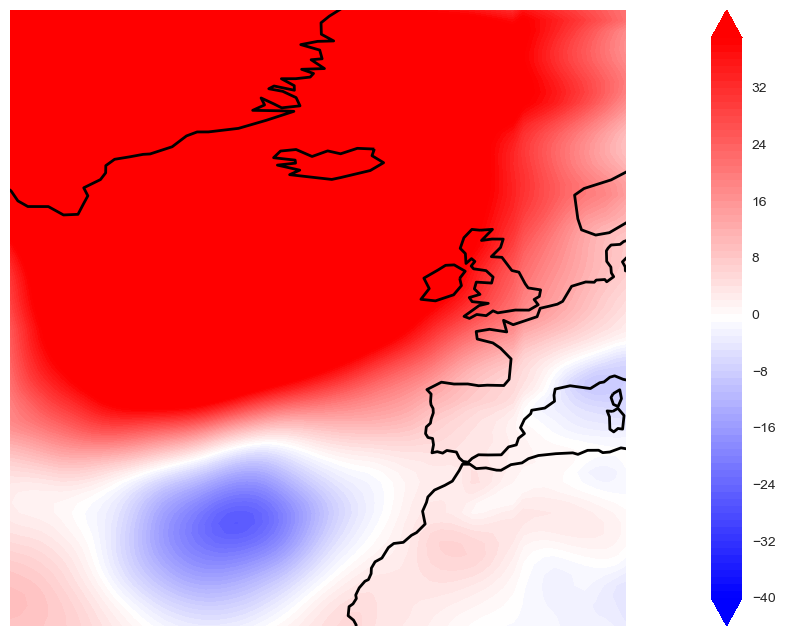

In [169]:
fig = plt.figure(figsize=(22,8)) 
dibujo_1_mapa_cartopy(slp2_sea_an[:,0]/10,lon1,lat1,np.arange(-40,40), 'bwr','')

In [170]:
#veamos si mi indice DE LA NAO EN PRIMAVERA se parece a la eof
A=slp2_sea_an[:110,0]
PC119712010=PC1s[:110,0]
b=pearsonr(A,PC119712010)
print(b)

(-0.33835044123217806, 0.0002999419746399884)


In [176]:
print(slp2_sea_an.shape)
tn10_slp___=tn10_slp.transpose()
print(tn10_slp___.shape)

(3721, 111)
(115, 95, 111)


In [179]:
tn10_slp_reshape=np.reshape(np.array(tn10_slp___),(115*95,111))

In [181]:
nmes=1 #bloques por año
#nm=1 # numero de modos
# se hace esto porque no puede trabajr con nans
Z1=np.nan_to_num(tn10_slp_reshape,nan=-999) # campo a predecir matriz de extremos
Y1=np.nan_to_num(slp2_sea_an,nan=-999) # campo predictor matriz SLP
# poniendo Y1.data te quita la mascara en caso de que la haya, que puede dar problemas
RUY,RUY_sig,SUY,SUY_sig,RUZ,RUZ_sig,SUZ,SUZ_sig,Us,Vs,scf=MCA(np.asarray(Z1),np.asarray(Y1),nmes,3,'MCA',0.1,'MonteCarlo',100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


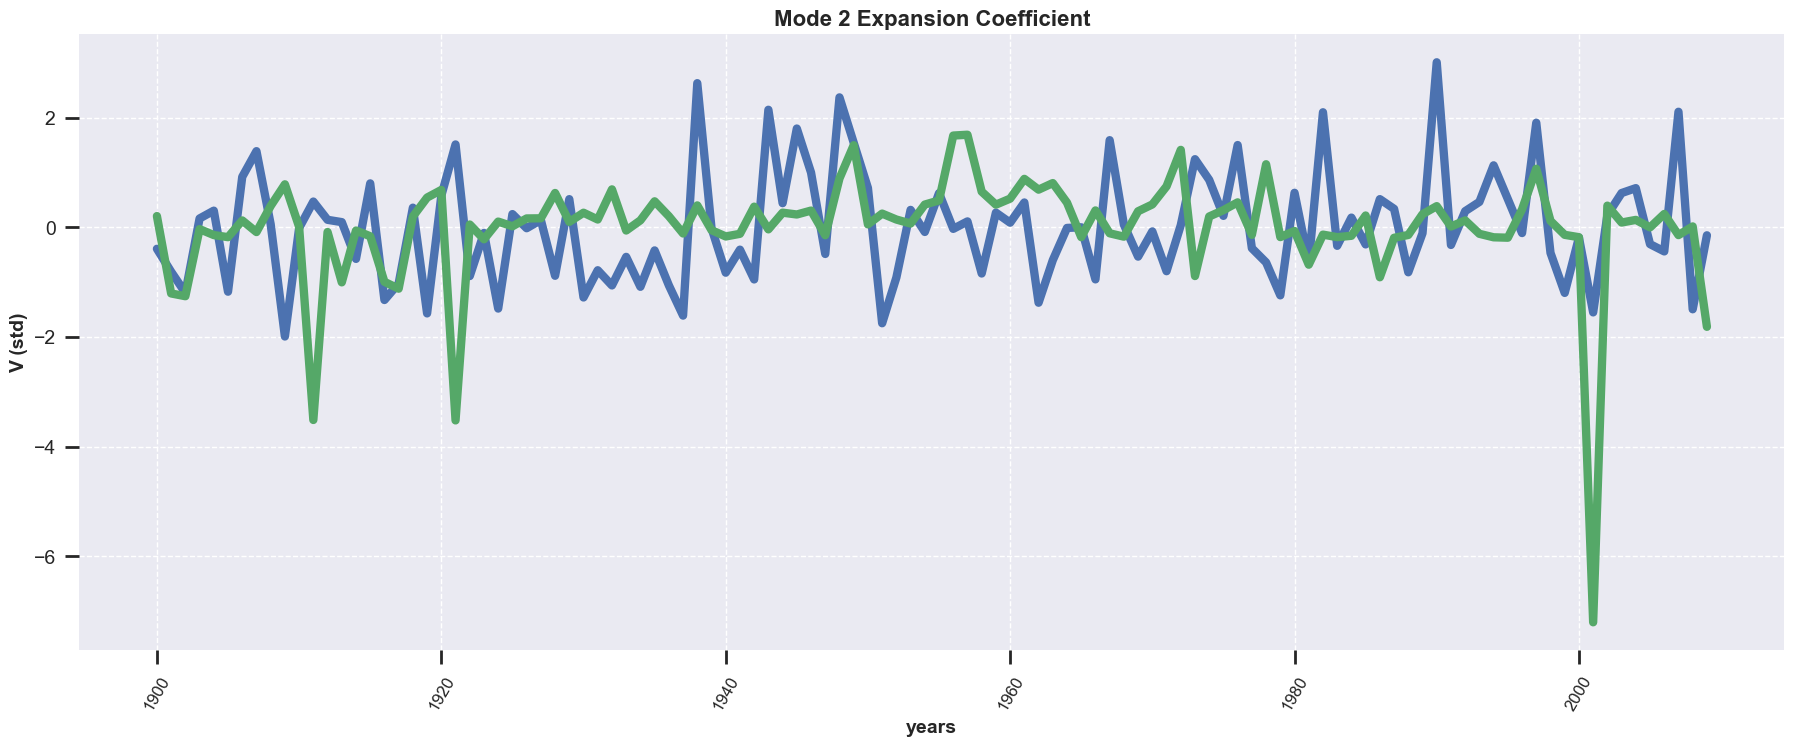

In [182]:
fig = plt.figure(figsize=(22,8)) 
ax=fig.add_subplot(1, 1, 1)
dibujo_timeserie(ax,Us[1,:110],yrslp[:110],'U (std)','years','Mode 2 Expansion Coefficient')
dibujo_timeserie(ax,Vs[1,:110],yrslp[:110],'V (std)','years','Mode 2 Expansion Coefficient')

In [183]:
r=pearsonr(np.transpose(Us[1,:]),np.transpose(Vs[1,:]))
r

(0.09331078286216812, 0.3300124783457389)

In [184]:
scf[0]

0.2507388202921597

In [185]:
SUZ.shape
lon1.shape
lat1.shape

(61,)

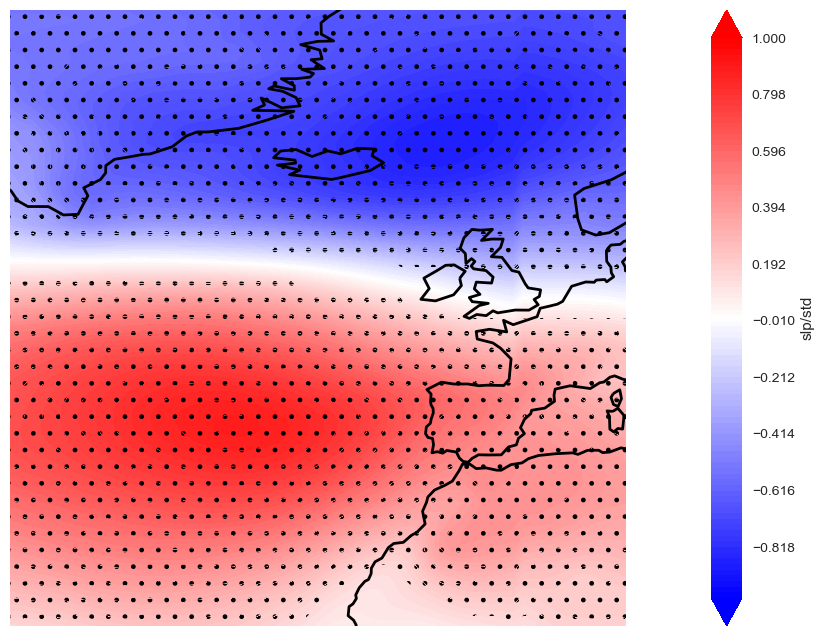

In [186]:
fig = plt.figure(figsize=(22,8)) 
dibujo_2_mapas_cartopy_hatches(RUY[:,0],RUY_sig[:,0],lon1,lat1,np.linspace(-1,1,100),'bwr', 'slp/std', 'mapa heterogéneo')

In [190]:
lat

<xarray.DataArray 'latitude' (latitude: 40)>
array([ 19.5,  18.5,  17.5,  16.5,  15.5,  14.5,  13.5,  12.5,  11.5,  10.5,
         9.5,   8.5,   7.5,   6.5,   5.5,   4.5,   3.5,   2.5,   1.5,   0.5,
        -0.5,  -1.5,  -2.5,  -3.5,  -4.5,  -5.5,  -6.5,  -7.5,  -8.5,  -9.5,
       -10.5, -11.5, -12.5, -13.5, -14.5, -15.5, -16.5, -17.5, -18.5, -19.5],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 19.5 18.5 17.5 16.5 ... -16.5 -17.5 -18.5 -19.5
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [193]:
lon

<xarray.DataArray 'longitude' (longitude: 110)>
array([-179.5, -178.5, -177.5, -176.5, -175.5, -174.5, -173.5, -172.5, -171.5,
       -170.5, -169.5, -168.5, -167.5, -166.5, -165.5, -164.5, -163.5, -162.5,
       -161.5, -160.5, -159.5, -158.5, -157.5, -156.5, -155.5, -154.5, -153.5,
       -152.5, -151.5, -150.5, -149.5, -148.5, -147.5, -146.5, -145.5, -144.5,
       -143.5, -142.5, -141.5, -140.5, -139.5, -138.5, -137.5, -136.5, -135.5,
       -134.5, -133.5, -132.5, -131.5, -130.5, -129.5, -128.5, -127.5, -126.5,
       -125.5, -124.5, -123.5, -122.5, -121.5, -120.5, -119.5, -118.5, -117.5,
       -116.5, -115.5, -114.5, -113.5, -112.5, -111.5, -110.5, -109.5, -108.5,
       -107.5, -106.5, -105.5, -104.5, -103.5, -102.5, -101.5, -100.5,  -99.5,
        -98.5,  -97.5,  -96.5,  -95.5,  -94.5,  -93.5,  -92.5,  -91.5,  -90.5,
        -89.5,  -88.5,  -87.5,  -86.5,  -85.5,  -84.5,  -83.5,  -82.5,  -81.5,
        -80.5,  -79.5,  -78.5,  -77.5,  -76.5,  -75.5,  -74.5,  -73.5,  -72.5,
        -71.5,  -70.5], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... -72.5 -71.5 -70.5
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [197]:
SUZ[:,0].shape

(10925,)

In [198]:
SUZ_sig[:,0].shape

(10925,)

ValueError: cannot reshape array of size 10925 into shape (40,110)

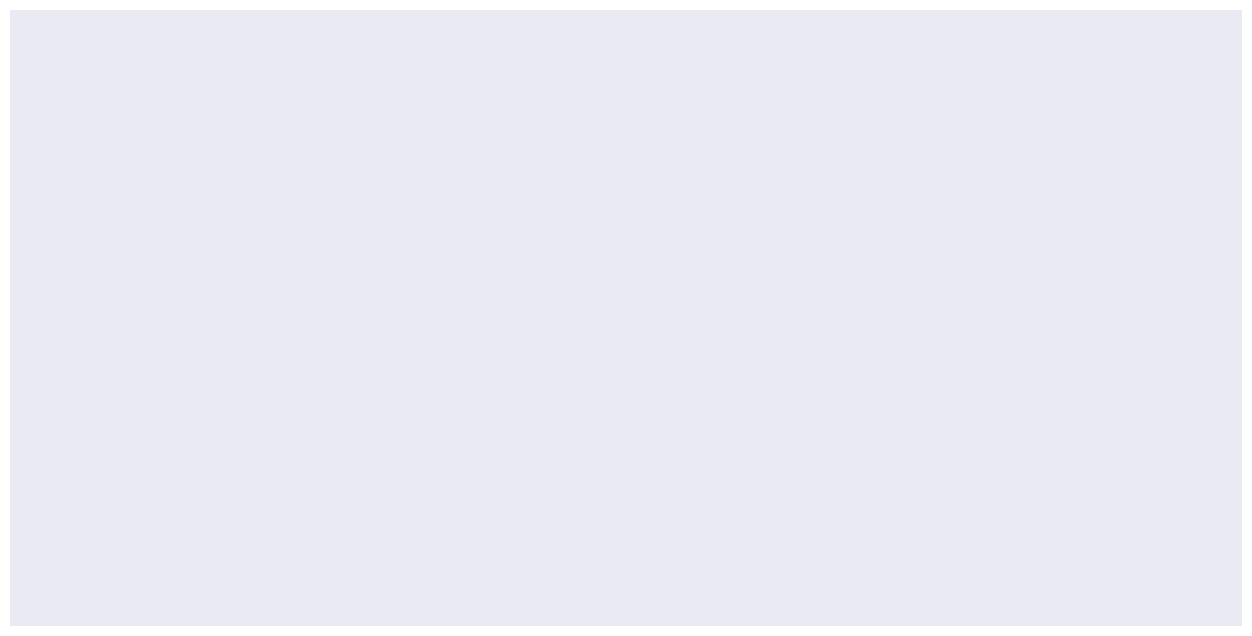

In [194]:

fig = plt.figure(figsize=(22,8)) 
dibujo_2_mapas_cartopy_hatches(SUZ[:,0],SUZ_sig[:,0],lon,lat,np.linspace(-40,40,100),'bwr', '','')